### Import Libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import display, HTML
import xlwings as xw

import anvil.server

anvil.server.connect("LBUAIAILHSBQKPW6RR7TBJUZ-SGSOKCIH4IVTIIQU")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


### Import Datasets

In [2]:
df = pd.read_csv('alumnos.csv')

In [3]:
df_hs = pd.read_csv('todos-los-contactos.csv', low_memory=False)

### Convert dates to datetimes formar and agregate month and year column

In [4]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')

In [5]:
df['mes'] = df['Fecha'].dt.month
df['año'] = df['Fecha'].dt.year

In [6]:
df_hs['Fecha'] = pd.to_datetime(df_hs['Owner Assigned Date'], format='%Y/%m/%d')

In [7]:
df_hs['mes'] = df_hs['Fecha'].dt.month
df_hs['año'] = df_hs['Fecha'].dt.year

### Some fixes to the datasets

#### BI dataset

In [8]:
codigos = df['Edición'].value_counts().sort_index().index.to_list()
codigos

['AA0919',
 'B2B0220',
 'B2B0920',
 'B2B0920STR',
 'B2B1019',
 'B2BEN0920',
 'CIB0421',
 'CIB0421STR',
 'DBE062020',
 'DMEN0321',
 'DMEN0520',
 'DMEN0920',
 'DPM0220',
 'DPM0221',
 'DPM0221STR',
 'DPM0320-ON',
 'DPM0419',
 'DPM0520',
 'DPM0520STR',
 'DPM0919',
 'DPM0920',
 'DPM0920STR',
 'DPM0921',
 'DPM1120',
 'DPM1120STR',
 'DPMEN0321',
 'DPMEN0920-ON',
 'DSC0221',
 'DSC0321STR',
 'DSC0421',
 'DSC0520',
 'DSC0520STR',
 'DSC0521MAD',
 'DSC0920',
 'DSC0920STR',
 'DSC0921',
 'DTAM0221',
 'DTAM0221STR',
 'DTM0120',
 'DTM0221',
 'DTM0221STR',
 'DTM0419',
 'DTM0421STR',
 'DTM0520',
 'DTM0520STR',
 'DTM0920',
 'DTM0920ST',
 'DTM1019',
 'FSD0221',
 'FSD0320',
 'FSD0321STR',
 'FSD0421',
 'FSD0520-EN',
 'FSD0521MAD',
 'FSD0620',
 'FSD0620STR',
 'FSD0919',
 'FSD0920',
 'FSD1020STR',
 'FSD1021STR',
 'FSD1120',
 'UIUX1120STR',
 'UXUI0121',
 'UXUI0121STR',
 'UXUI0620',
 'UXUI0620STR',
 'UXUI1120']

In [9]:
df['Edición'].replace({
                            'B2B0220':'B2B_BAR',
                            'B2B0920':'B2B_BAR',
                            'B2B0920STR':'B2B_STR',
                            'B2B1019':'B2B_BAR',
                            'B2BEN0920':'B2B_INT',
                            'CIB0421':'CIB_BAR',
                            'CIB0421STR':'CIB_STR',
                            'DBE062020':'DBE_INT',
                            'DMEN0321':'DM_INT',
                            'DMEN0520':'DM_INT',
                            'DMEN0920':'DM_INT',
                            'DPM0220':'DPM_BAR',
                            'DPM0221':'DPM_BAR',
                            'DPM0221STR':'DPM_STR',
                            'DPM0320-ON':'DPM_INT',
                            'DPM0419':'DPM_BAR',
                            'DPM0520':'DPM_BAR',
                            'DPM0520STR':'DPM_STR',
                            'DPM0919':'DPM_BAR',
                            'DPM0920':'DPM_BAR',
                            'DPM0920STR':'DPM_STR',
                            'DPM0921':'DPM_BAR',
                            'DPM1120':'DPM_BAR',
                            'DPM1120STR':'DPM_STR',
                            'DPMEN0321':'DPM_INT',
                            'DPMEN0920-ON':'DPM_INT',
                            'DSC0221':'DSC_BAR',
                            'DSC0321STR':'DSC_STR',
                            'DSC0421':'DSC_BAR',
                            'DSC0520':'DSC_BAR',
                            'DSC0520STR':'DSC_STR',
                            'DSC0521MAD':'DSC_MAD',
                            'DSC0920':'DSC_BAR',
                            'DSC0920STR':'DSC_STR',
                            'DSC0921':'DSC_BAR',
                            'DTAM0221':'DTAM_BAR',
                            'DTAM0221STR':'DTAM_STR',
                            'DTM0120':'DTM_BAR',
                            'DTM0221':'DTM_BAR',
                            'DTM0221STR':'DTM_STR',
                            'DTM0419':'DTM_BAR',
                            'DTM0421STR':'DTM_STR',
                            'DTM0520':'DTM_BAR',
                            'DTM0520STR':'DTM_STR',
                            'DTM0920':'DTM_BAR',
                            'DTM0920ST':'DTM_STR',
                            'DTM1019':'DTM_BAR',
                            'FSD0221':'FSD_BAR',
                            'FSD0320':'FSD_BAR',
                            'FSD0321STR':'FSD_STR',
                            'FSD0421':'FSD_BAR',
                            'FSD0520-EN':'FSD_INT',
                            'FSD0521MAD':'FSD_MAD',
                            'FSD0620':'FSD_BAR',
                            'FSD0620STR':'FSD_STR',
                            'FSD0919':'FSD_BAR',
                            'FSD0920':'FSD_BAR',
                            'FSD1020STR':'FSD_STR',
                            'FSD1021STR':'FSD_STR',
                            'FSD1120':'FSD_BAR',
                            'UXUI0121':'UXUI_BAR',
                            'UXUI0121STR':'UXUI_STR',
                            'UXUI0620':'UXUI_BAR',
                            'UXUI0620STR':'UXUI_STR',
                            'UXUI1120':'UXUI_BAR',
                            'UXUI1120STR':'UXUI_STR',
                            'UIUX1120STR':'UXUI_STR',
                            'AA0919':'DSC_BAR'
    
}, inplace=True)

In [10]:
codigos = df['Edición'].value_counts().sort_index().index.to_list()
codigos

['B2B_BAR',
 'B2B_INT',
 'B2B_STR',
 'CIB_BAR',
 'CIB_STR',
 'DBE_INT',
 'DM_INT',
 'DPM_BAR',
 'DPM_INT',
 'DPM_STR',
 'DSC_BAR',
 'DSC_MAD',
 'DSC_STR',
 'DTAM_BAR',
 'DTAM_STR',
 'DTM_BAR',
 'DTM_STR',
 'FSD_BAR',
 'FSD_INT',
 'FSD_MAD',
 'FSD_STR',
 'UXUI_BAR',
 'UXUI_STR']

In [11]:
df.head()

,ID,Alumno,Fecha,Canal,Comercial,Tipo de Pago,#1 Pago,Precio,Edición,TipoCli,mes,año
0,3,Lilieth,2018-12-19,Referral,Otros,Contado,5000,5000,DTM_BAR,B2C,12,2018
1,4,Enrique Contreras,2018-12-19,Direct,Otros,Contado,5175,5175,DPM_BAR,B2C,12,2018
2,5,Gerard Costa,2019-02-01,Direct,Otros,Plazos,536,3500,DPM_BAR,B2C,2,2019
3,6,Alberto Mozo,2019-02-08,Paid Media,Otros,Plazos,350,3500,DPM_BAR,B2C,2,2019
4,7,Carla Garcia,2019-02-21,Redes Sociales,Otros,Contado,4000,4000,DPM_BAR,B2C,2,2019


In [12]:
df['Comercial'].value_counts()

Jorge Jimenez       122
Joel Orteu          110
Irene Safer          93
Sergio del Frago     89
Otros                60
Veronica Cignoli     45
Francesc Ramirez     36
Albert Cobacho       29
Jordi Tena           28
Ahmad Halloun        20
Anna Rovira          20
Joanne Mattar        17
Gara Gutierrez        9
Clara Fernandez       9
Vanina Correa         7
Sonia Perez           4
Cyntia Sena           4
Gisela Moreno         3
Paola Lemos           2
Name: Comercial, dtype: int64

In [13]:
df_hs['Contact owner'].value_counts()

Jorge Jiménez                                 4009
Veronica Cignoli                              3531
Joel Orteu                                    2523
Sergio del Frago                              2443
Irene Safer                                   2319
Ahmad Halloun                                 2059
Jordi Tena Legido                             1883
Joanne Mattar                                 1711
Francesc Ramirez                              1300
Anna Rovira                                    851
Gisela Moreno (Deactivated User)               697
Vanina Correa                                  687
Gara Gutierrez                                 648
Clara Fernández                                601
Sonia Pérez                                    576
Albert Cobacho                                 574
Cyntia Sena                                    564
Daniela Barreto                                522
Jared Gil                                      422
Paola Micaela Lemos Guedes     

In [14]:
df['Comercial'].replace({
                            
'Jorge Jimenez':'Jorge Jiménez',        
'Jordi Tena': 'Jordi Tena Legido',        
'Clara Fernandez':'Clara Fernández',       
'Gisela Moreno': 'Gisela Moreno (Deactivated User)',       
'Paola Lemos': 'Paola Micaela Lemos Guedes'         
    
}, inplace=True)

#### Hubspot Dataset

In [15]:
df_hs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34632 entries, 0 to 34631
Data columns (total 254 columns):
 #   Column                                                                                               Dtype         
---  ------                                                                                               -----         
 0   Contact ID                                                                                           int64         
 1   First Name                                                                                           object        
 2   Last Name                                                                                            object        
 3   Becas Digital Talent                                                                                 object        
 4   Broadcast Clicks                                                                                     float64       
 5   DNI/CIF                               

In [16]:
stats_desc = []
for col in df_hs.columns:
    stats_desc.append((col, df_hs[col].nunique(), df_hs[col].isnull().sum() * 100 / df_hs.shape[0], df_hs[col].value_counts(normalize=True, dropna=False).values[0] * 100, df_hs[col].dtype))
    
stats_df = pd.DataFrame(stats_desc, columns=['Feature', 'Unique_values', '% de nulos', '% de rep. mayor valor', 'type'])
stats_df.sort_values('% de nulos', ascending=False)

,Feature,Unique_values,% de nulos,% de rep. mayor valor,type
201,Augmented Analytics Máster,0,100.0,100.000000,float64
47,Buying Role,0,100.0,100.000000,float64
97,Start date,0,100.0,100.000000,float64
167,Twitter Bio,0,100.0,100.000000,float64
92,Became a Sales Qualified Lead Date,0,100.0,100.000000,float64
...,...,...,...,...,...
120,LinkedIn Clicks,8,0.0,99.953800,float64
125,Event Revenue,1,0.0,100.000000,float64
168,Twitter Clicks,1,0.0,100.000000,float64
194,Time First Seen,32843,0.0,0.615038,object


In [17]:
for col in df_hs.columns:
    if col not in ['Momento', 'Estado', 'Master', 'Contact owner', 'Owner Assigned Date', 'Original Source', 'EXPLICA MOTIVO CIERRE', 'Motivo del cierre', 'año', 'mes', 'Original Source Drill-Down 1' ]:
        if df_hs[col].value_counts(normalize=True, dropna=False).values[0] * 100 > 50:
            df_hs.drop([col], axis=1, inplace=True)
            continue
        if df_hs[col].isnull().sum() * 100 / df_hs.shape[0] > 20:
            df_hs.drop([col], axis=1, inplace=True)
    else:
        continue

In [18]:
df_hs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34632 entries, 0 to 34631
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Contact ID                       34632 non-null  int64         
 1   First Name                       33845 non-null  object        
 2   Last Name                        29405 non-null  object        
 3   Last marketing email name        33358 non-null  object        
 4   Master                           27195 non-null  object        
 5   Time of Last Session             30501 non-null  object        
 6   Time of First Session            30501 non-null  object        
 7   Number of times contacted        29031 non-null  float64       
 8   Number of Sales Activities       29031 non-null  float64       
 9   First Conversion Date            30033 non-null  object        
 10  Original Source                  34632 non-null  object   

In [19]:
df_hs['Master'].replace({
    'Digital Product Management - EN':'DPM_INT',
    'Digital Marketing - EN':'DM_INT',
    'Digital Product Management':'DPM_BAR',
    'Digital Traffic Management':'DTM_BAR',
    'Full Stack Development':'FSD_BAR',
    'Dirección de Ventas B2B':'B2B_BAR',
    'Digital Traffic Management - Streaming':'DTM_STR',
    'Master en UX/UI':'UXUI_BAR',
    'Full Stack Development - Streaming':'FSD_STR',
    'Data Science':'DSC_BAR',
    'Master en UX/UI - Streaming':'UXUI_STR',
    'Data Science - Streaming':'DSC_STR',
    'Digital Product Management - Streaming':'DPM_STR',
    'Máster en Digital Talent Management':'DTAM_BAR',
    'Máster en Digital Talent - Streaming':'DTAM_STR',
    'Máster en Ciberseguridad':'CIB_BAR',
    'Máster en Ciberseguridad - Streaming':'CIB_STR',
    'B2B - Streaming':'B2B_STR',
    'UX/UI-EN':'UX/UI_INT'                  
    
}, inplace=True)

In [20]:
df_hs['Master'].value_counts()

DPM_INT                                              4411
DM_INT                                               4227
DPM_BAR                                              2609
DTM_BAR                                              2503
FSD_BAR                                              1957
B2B_BAR                                              1363
DTM_STR                                              1197
UXUI_BAR                                             1139
FSD_STR                                              1111
DSC_BAR                                              1108
UXUI_STR                                              949
DSC_STR                                               797
B2B Management - EN                                   750
DPM_STR                                               710
Full Stack Development - EN                           595
Digital Business Modelling                            514
DTAM_BAR                                              444
DTAM_STR      

### Analysis with all the programs

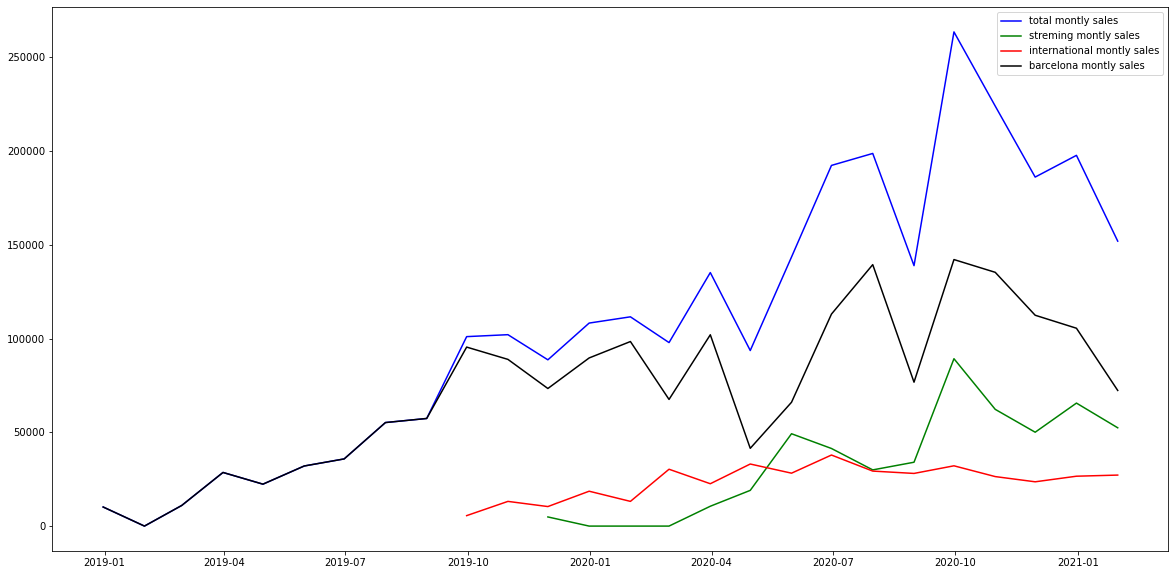

In [21]:
df_str = df[df['Edición'].str.contains('STR')]
df_en = df[df['Edición'].str.contains('INT')]
df_os = df[(~df['Edición'].str.contains('STR')) & (~df['Edición'].str.contains('INT'))]

x = df[['Fecha','Precio']].set_index('Fecha').resample('m').sum()
y = df_str[['Fecha','Precio']].set_index('Fecha').resample('m').sum()
z = df_en[['Fecha','Precio']].set_index('Fecha').resample('m').sum()
j = df_os[['Fecha','Precio']].set_index('Fecha').resample('m').sum()

plt.figure(figsize=(20,10))
plt.plot(x.index, x, color='blue', label='total montly sales')
plt.plot(y.index, y, color='green', label='streming montly sales')
plt.plot(z.index, z, color='red', label='international montly sales')
plt.plot(j.index, j, color='black', label='barcelona montly sales')
plt.legend()


### Gráfica de ventas de cada uno de los programas

<ipython-input-22-fd738b42ba64>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


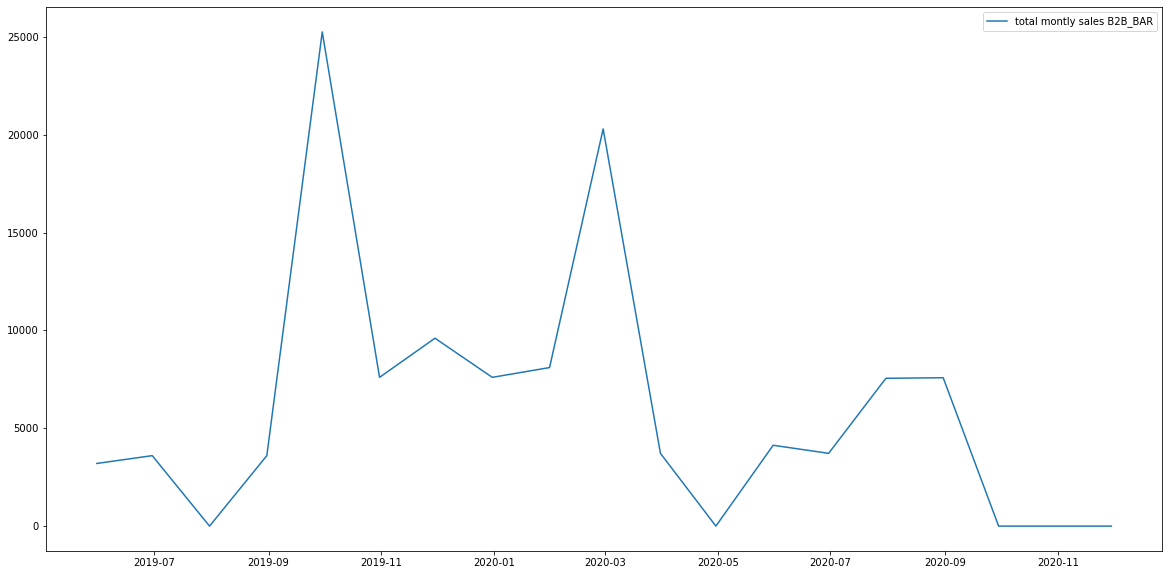

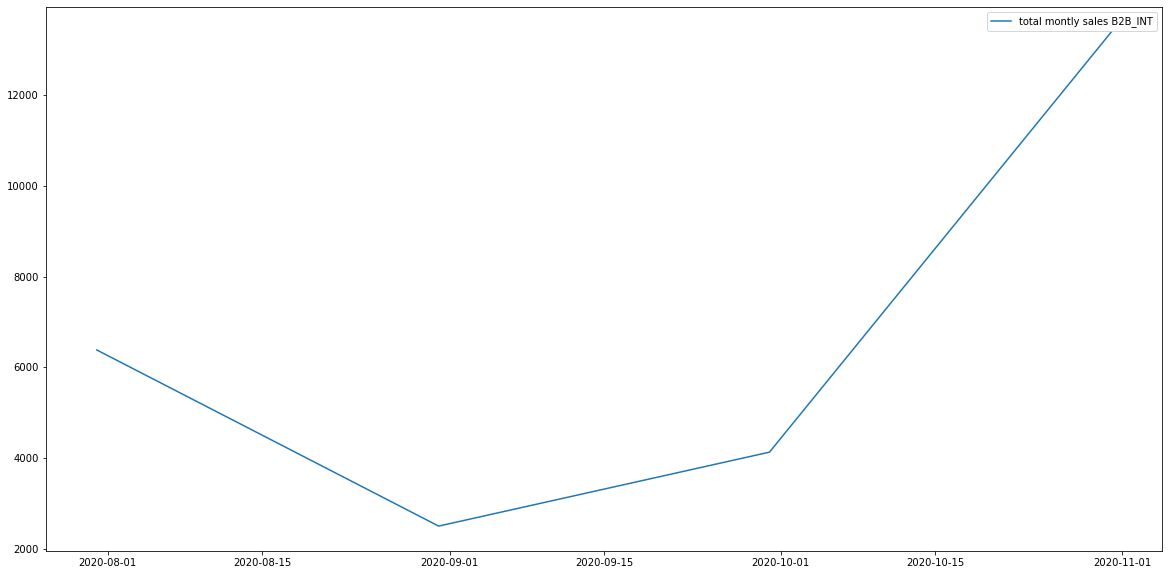

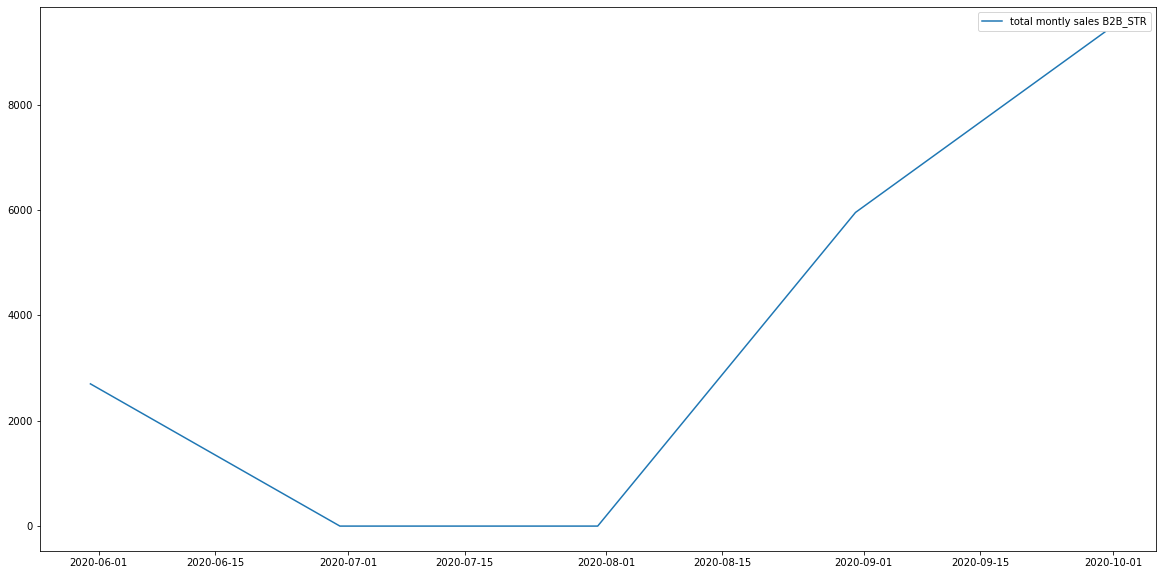

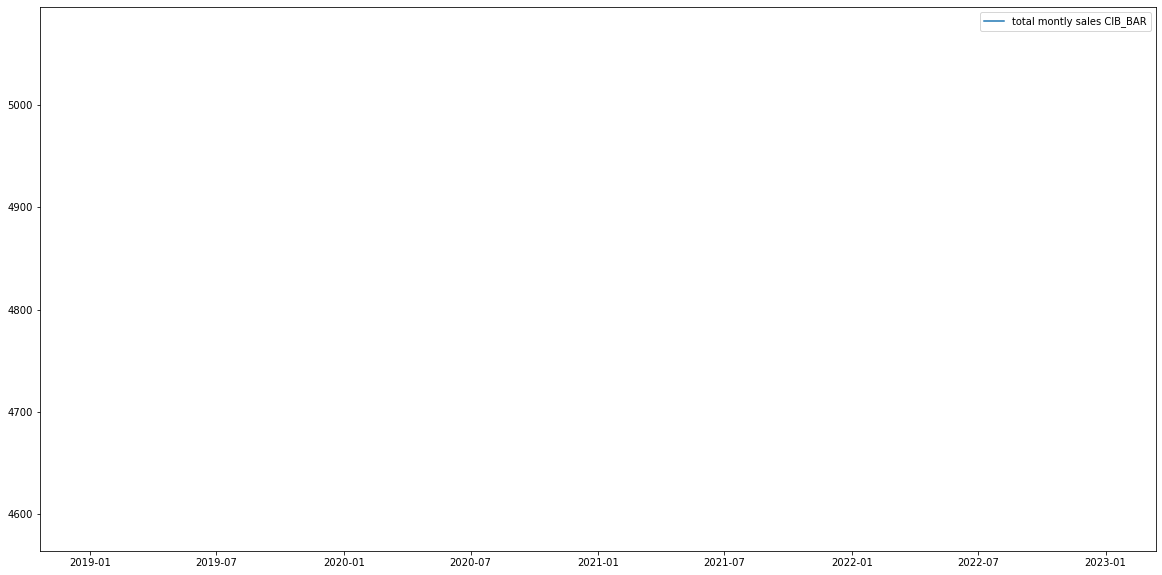

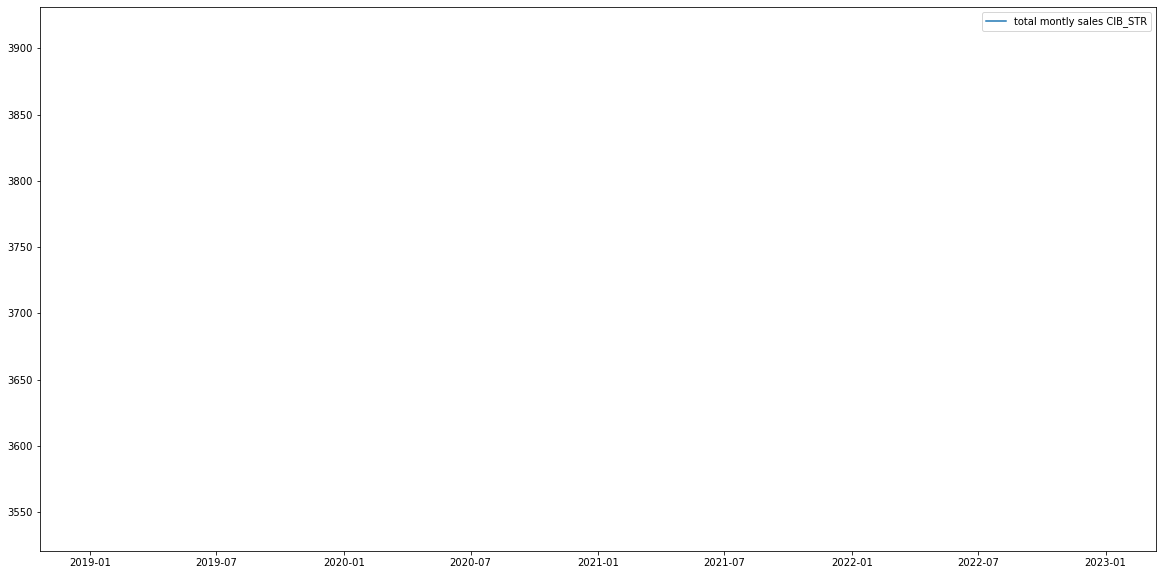

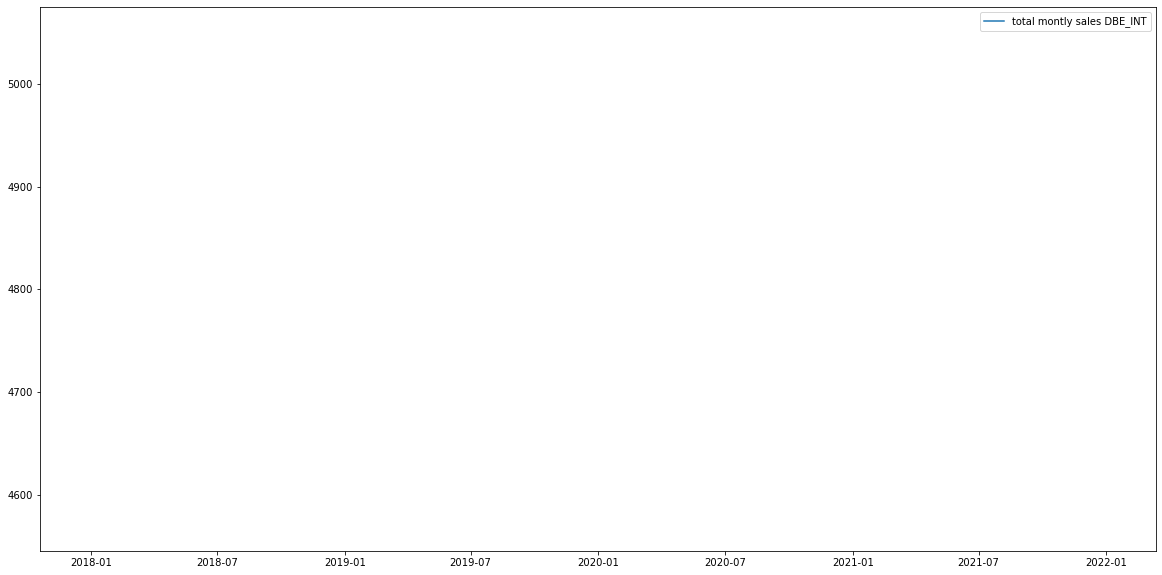

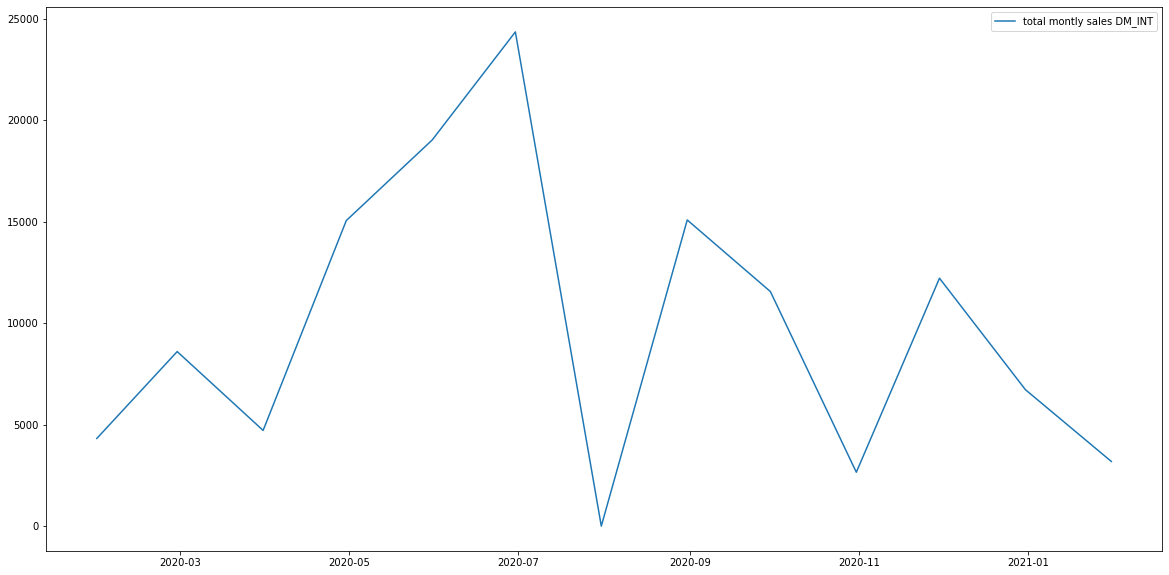

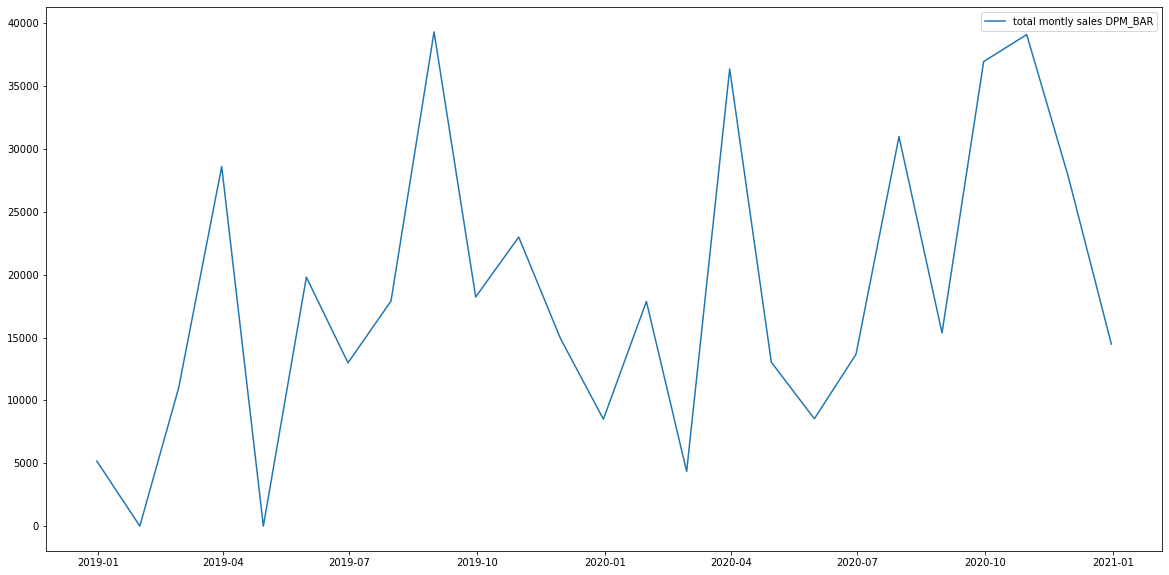

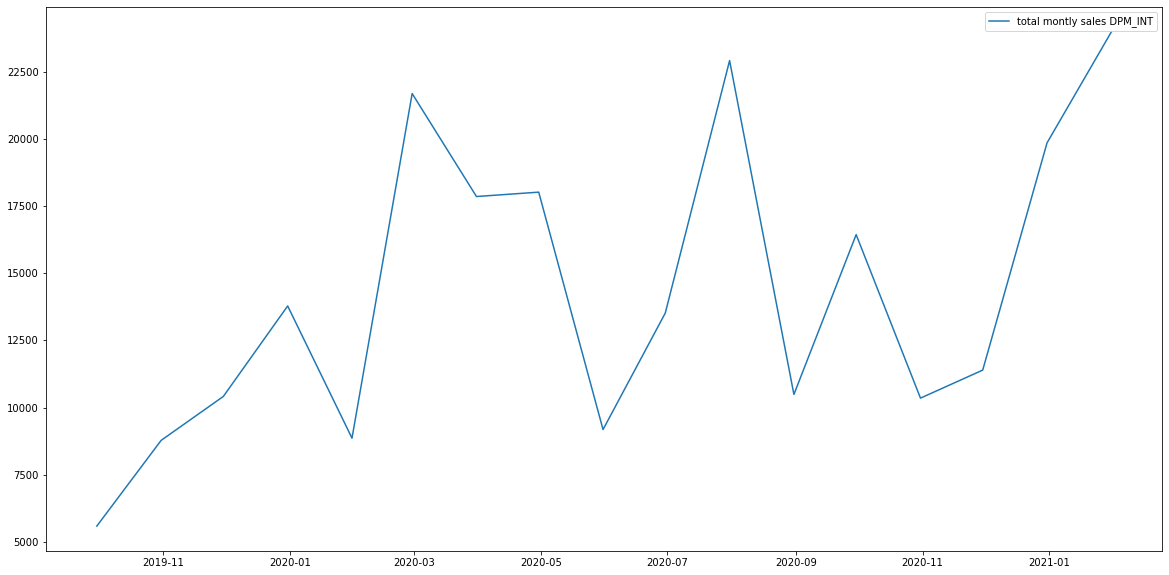

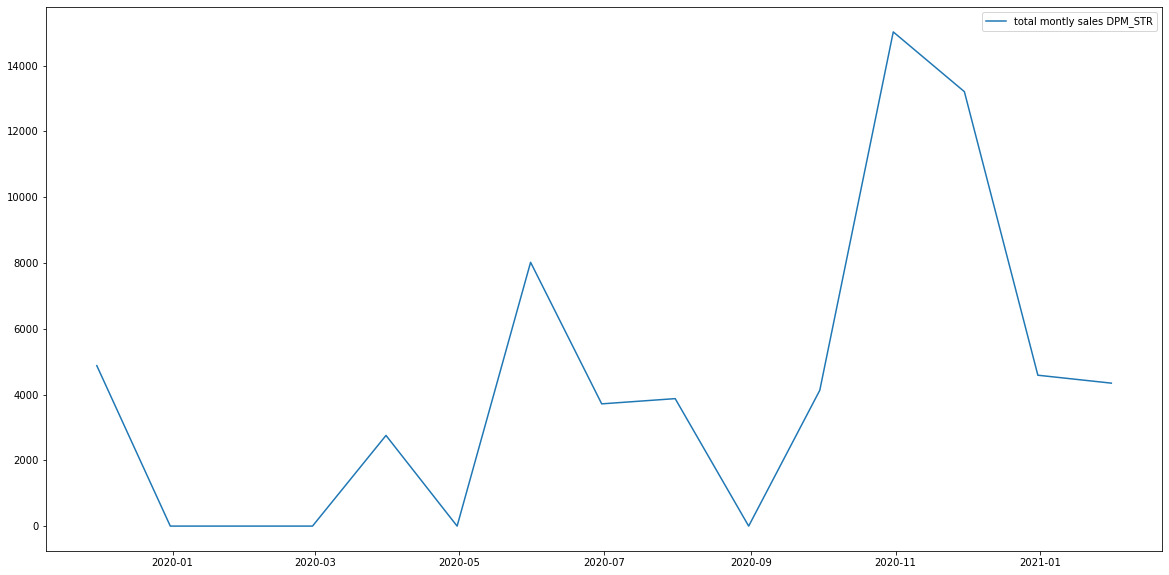

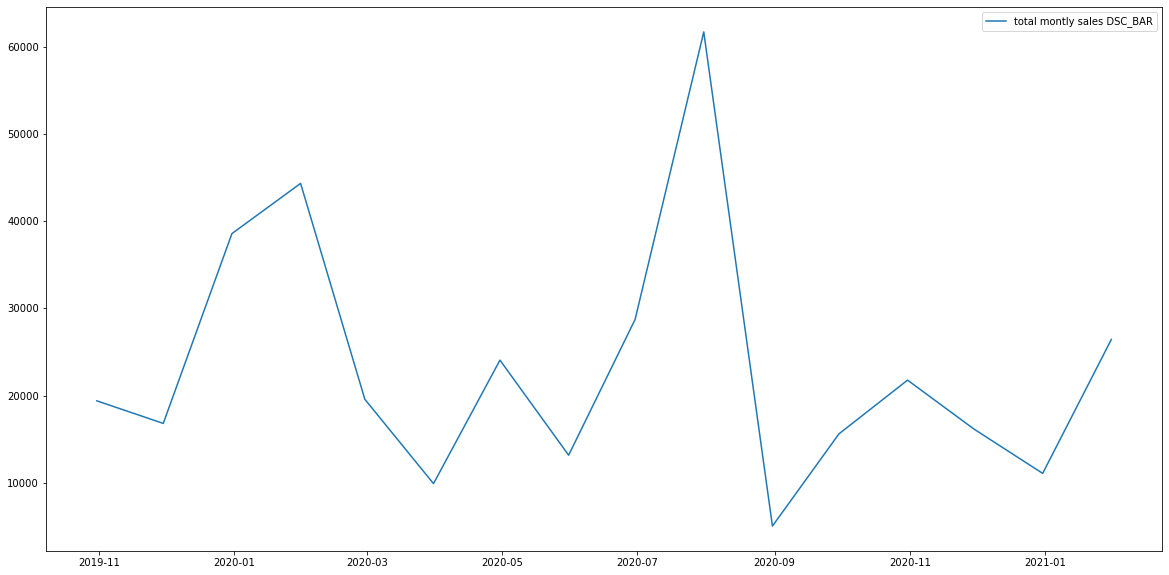

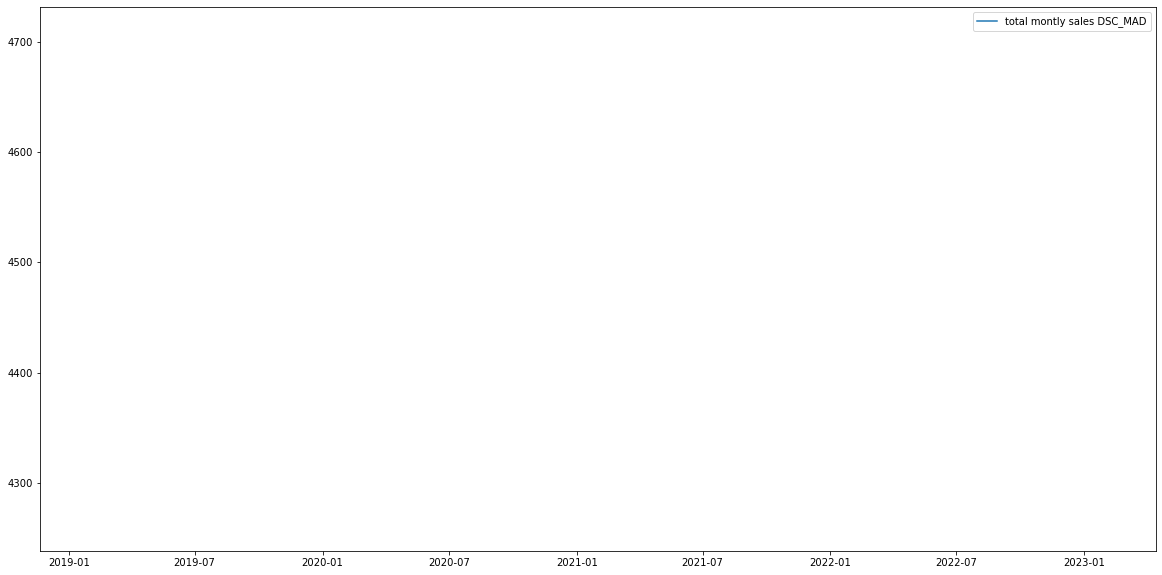

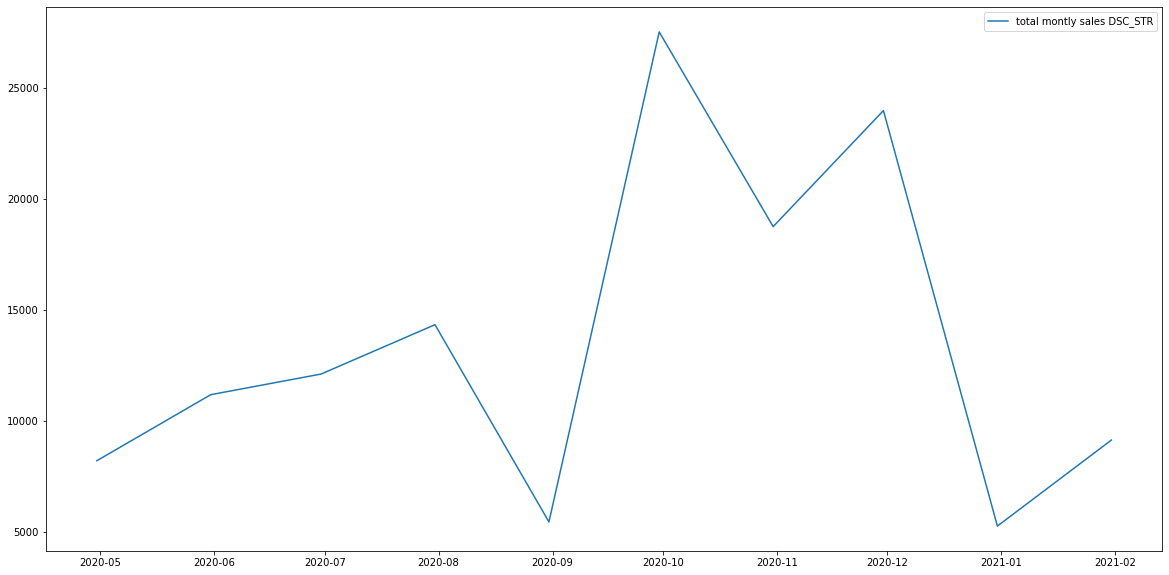

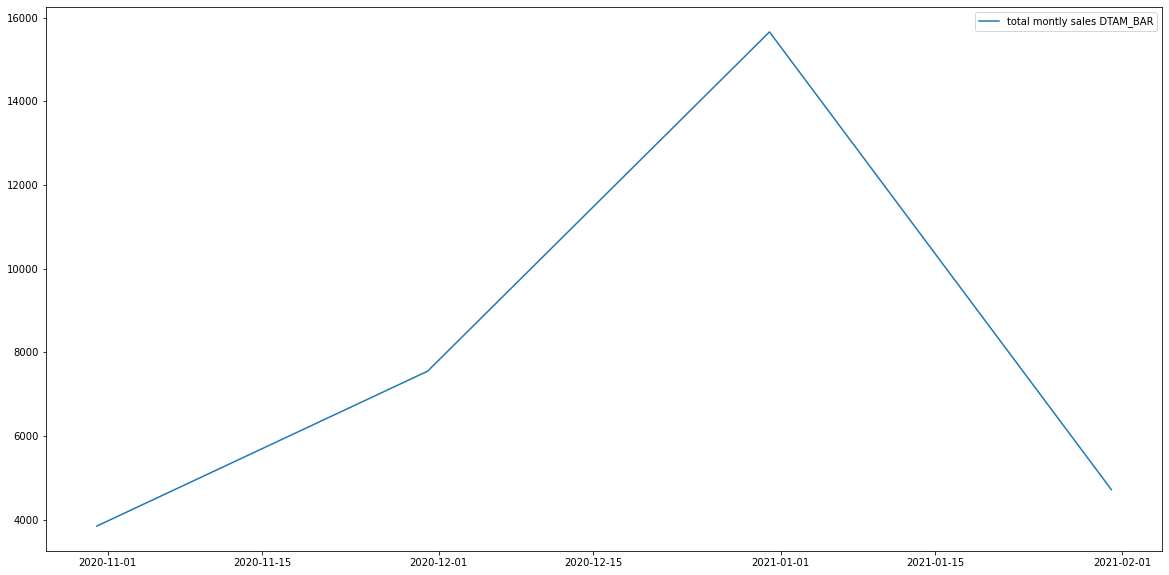

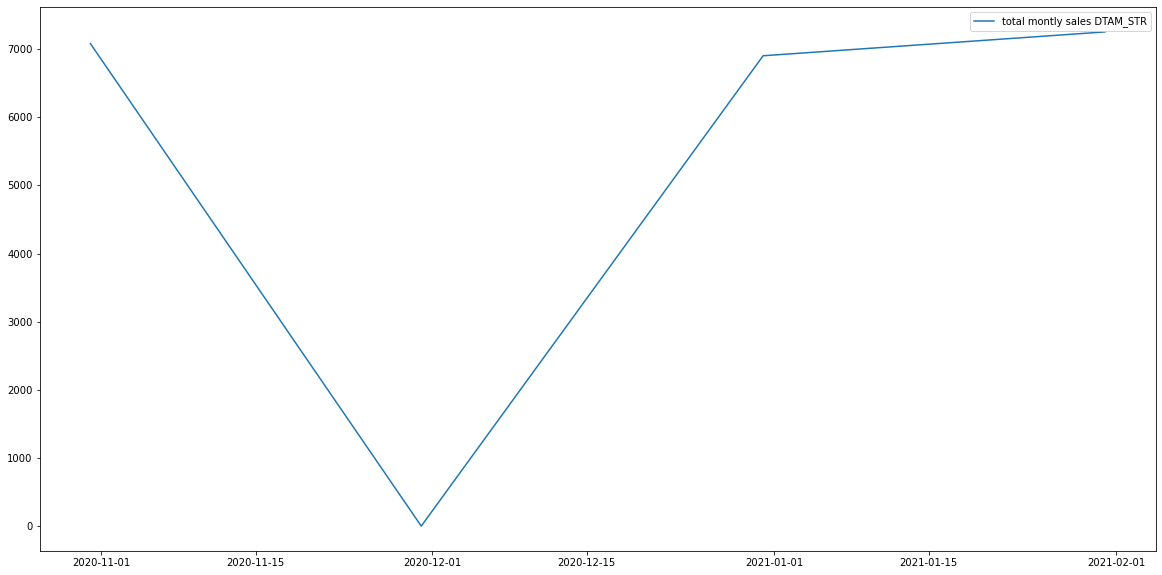

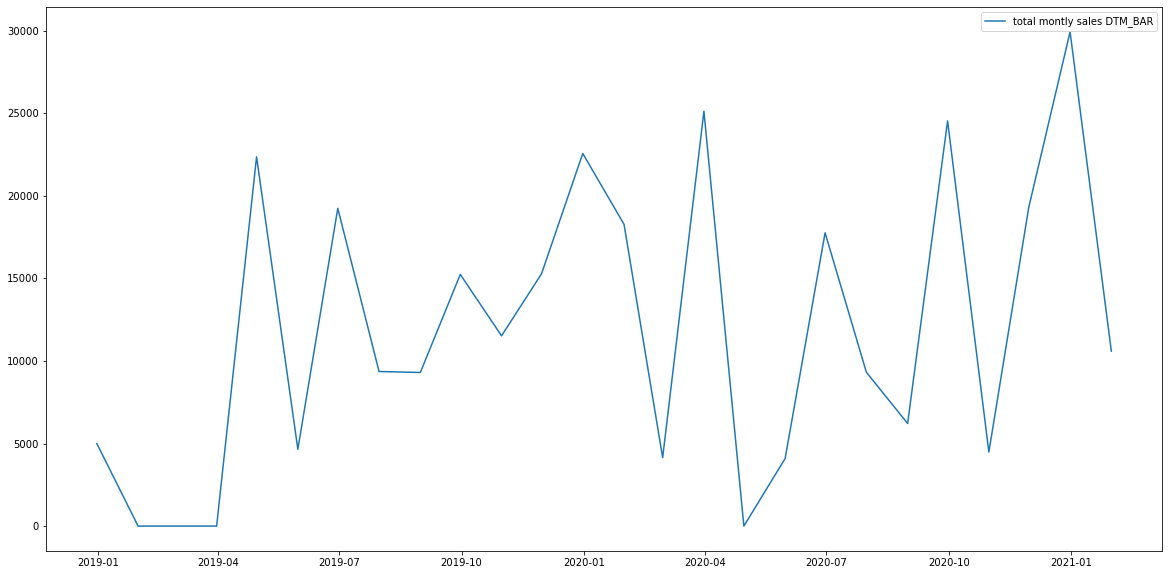

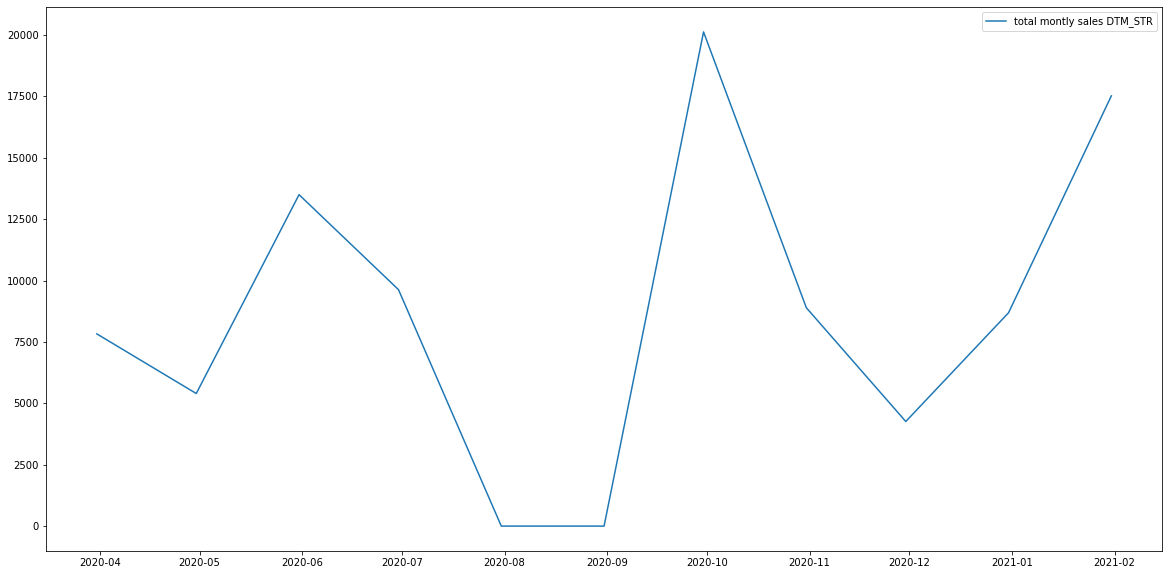

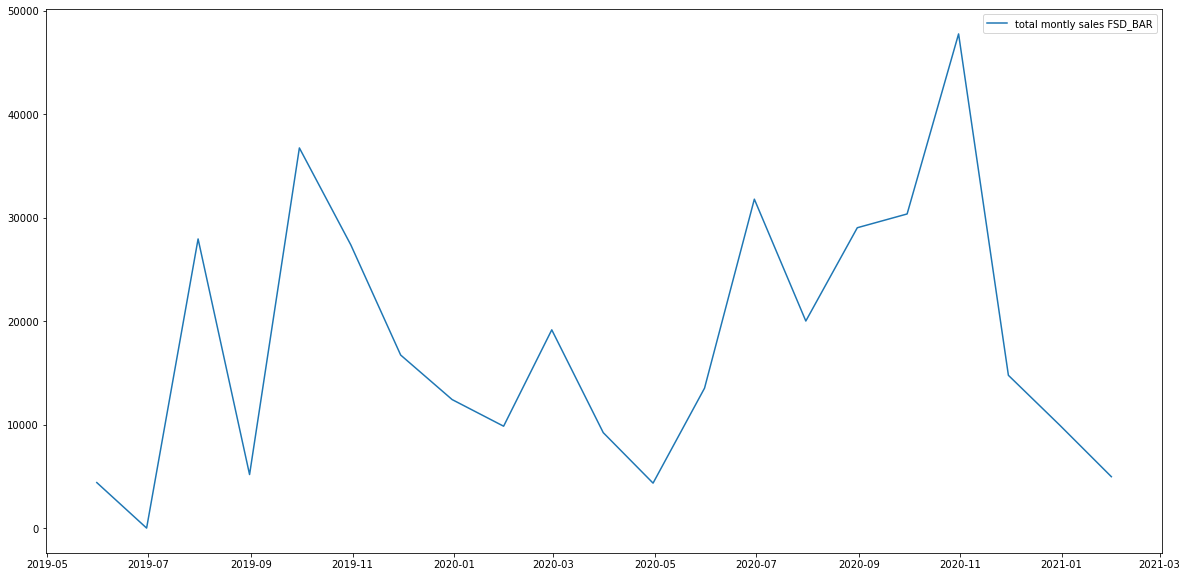

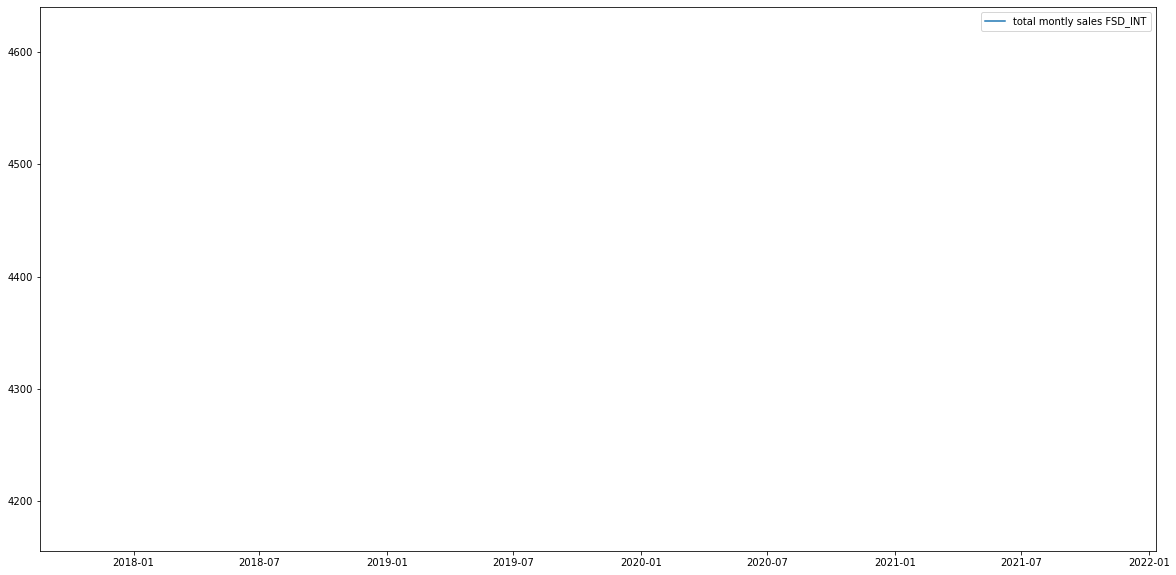

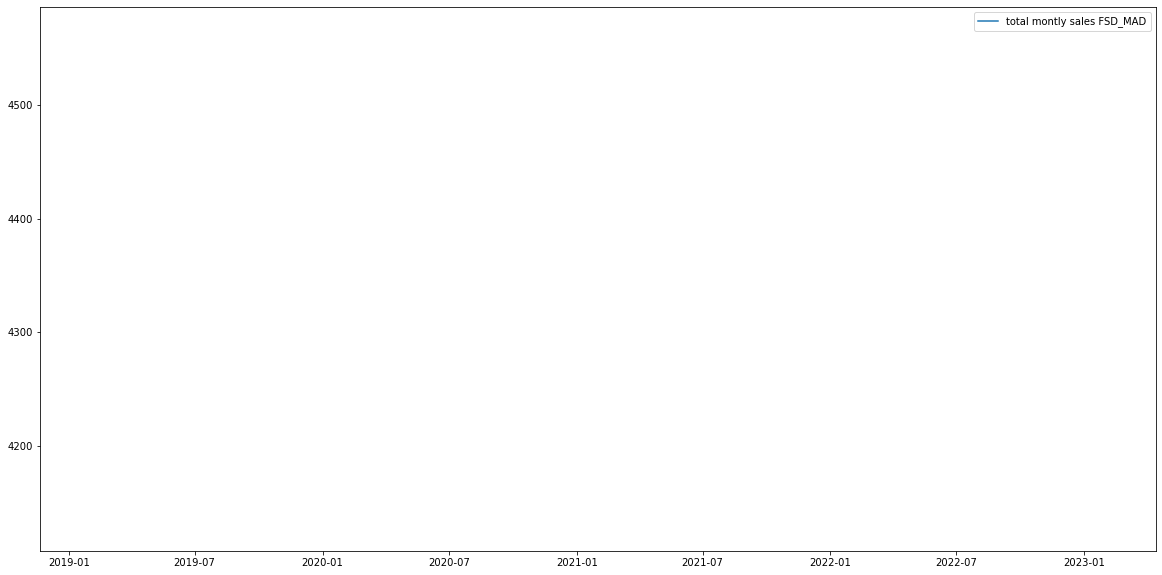

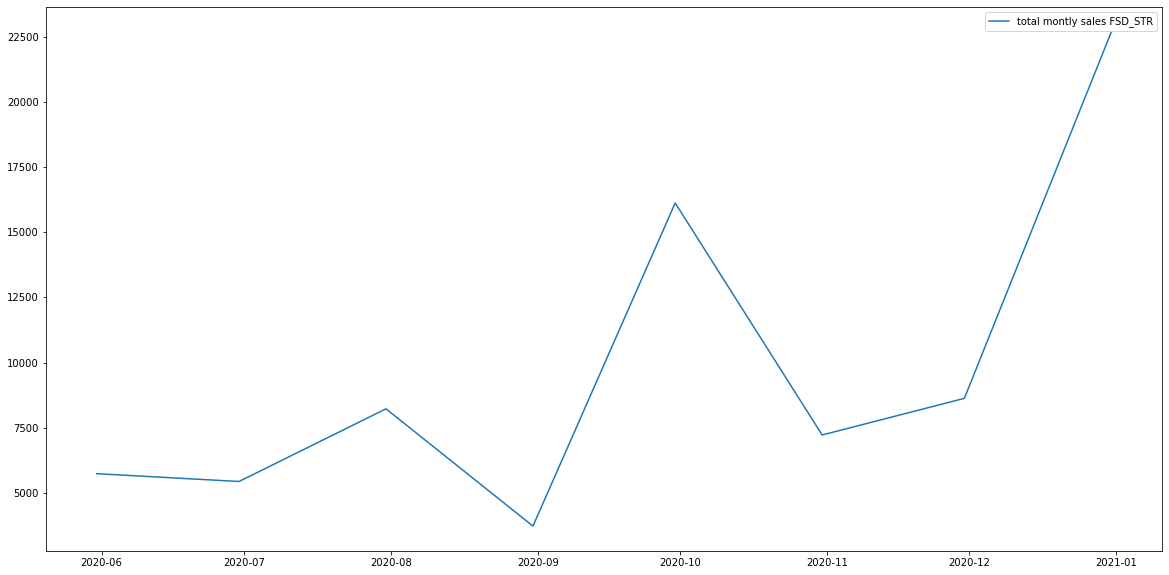

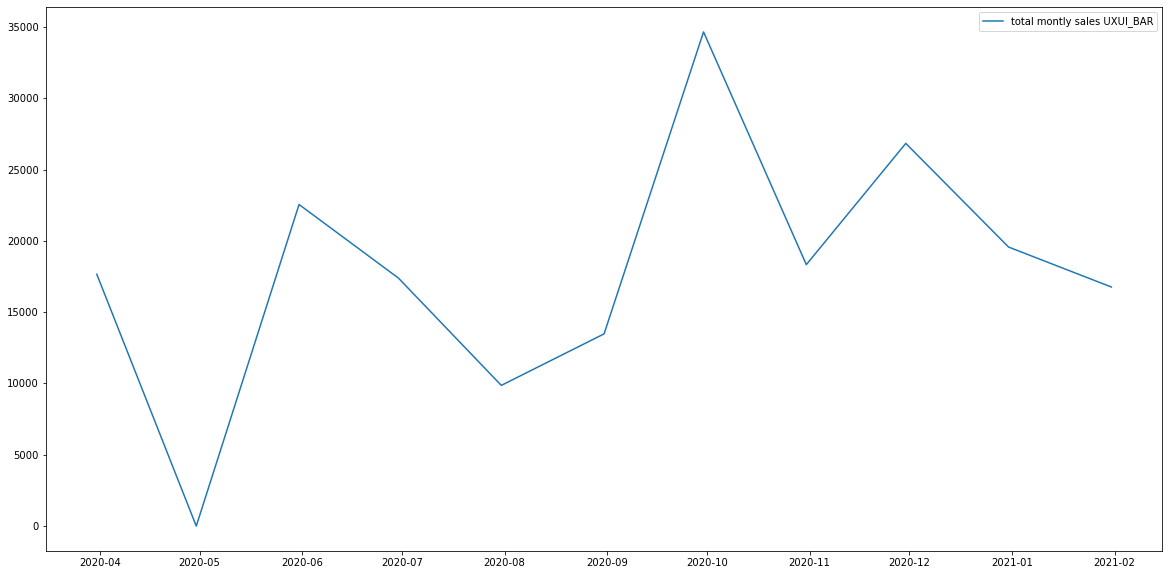

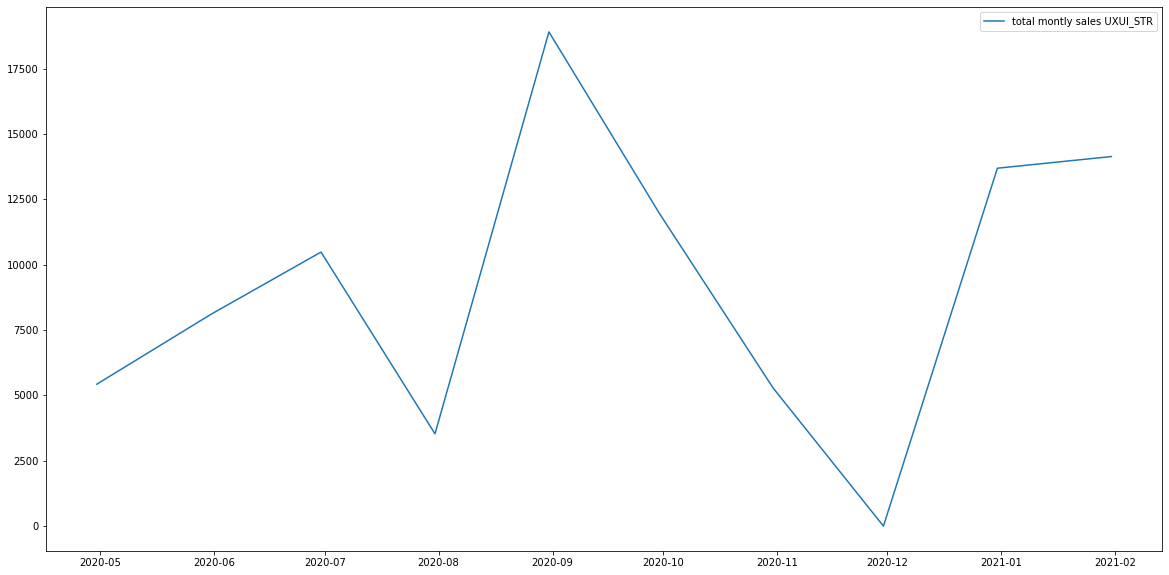

In [22]:
codigos = df['Edición'].value_counts().sort_index().index.to_list()

for i in codigos:
    plt.figure(figsize=(20,10))
    df_1 = df[df['Edición'].str.contains(i)]
    x = df_1[['Fecha','Precio']].set_index('Fecha').resample('m').sum()
    plt.plot(x.index, x, label='total montly sales {}'.format(i))
    plt.legend()
    
    

### Función para graficar ventas por cada programa

In [23]:
def ventas_master(codigo):
    plt.figure(figsize=(20,10))
    df_1 = df[df['Edición'].str.contains(codigo)]
    x = df_1[['Fecha','Precio']].set_index('Fecha').resample('m').sum()
    plt.plot(x.index, x, label='total montly sales {}'.format(codigo))
    plt.legend()

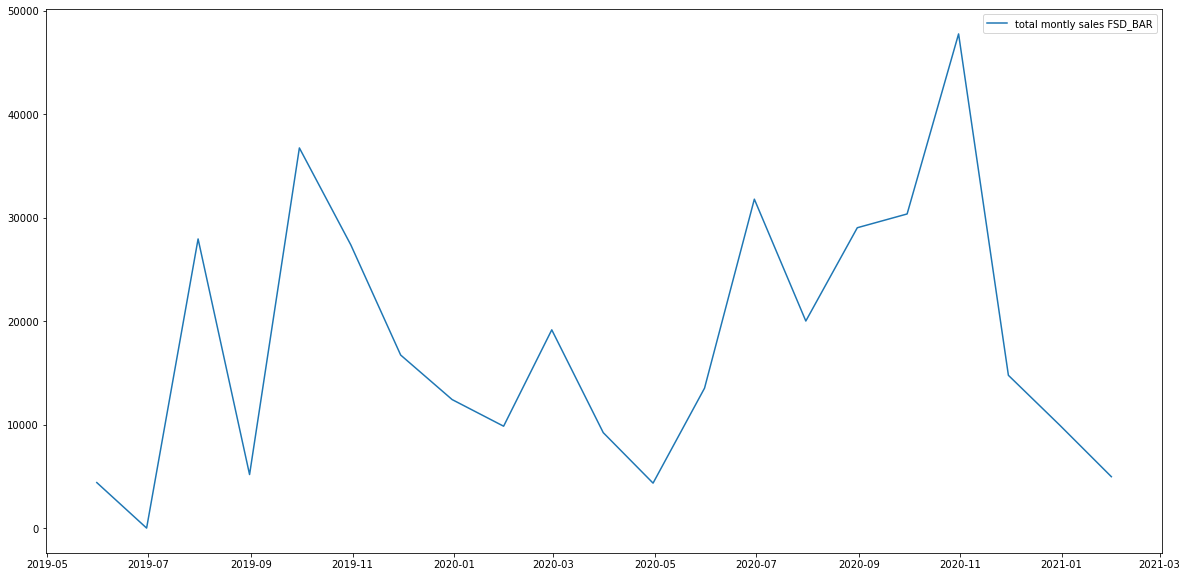

In [24]:
ventas_master('FSD_BAR')

In [25]:
def matriculas_master(codigo):
    plt.figure(figsize=(20,10))
    df_1 = df[df['Edición'].str.contains(codigo)]
    x = df_1[['Fecha','Precio']].set_index('Fecha').resample('m').count()
    plt.plot(x.index, x, label='total montly sales {}'.format(codigo))
    plt.legend()

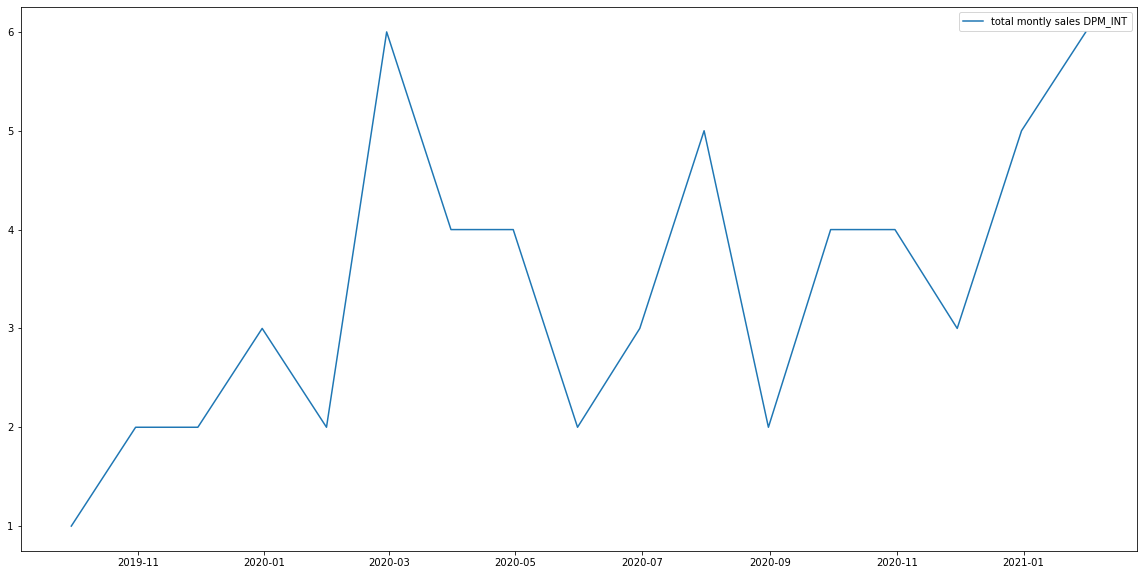

In [26]:
matriculas_master('DPM_INT')

### Función para graficar ventas por cada programa y leads mensuales

In [27]:
df_h1 = df_hs[['Master', 'Fecha', 'Contact owner', 'Estado', 'Original Source', 'año', 'mes', 'Motivo del cierre', 'EXPLICA MOTIVO CIERRE', 'Original Source Drill-Down 1' , 'Original Source Drill-Down 2']]
df_h1

,Master,Fecha,Contact owner,Estado,Original Source,año,mes,Motivo del cierre,EXPLICA MOTIVO CIERRE,Original Source Drill-Down 1,Original Source Drill-Down 2
0,NaN,NaT,NaN,NaN,Offline Sources,NaN,NaN,NaN,NaN,INTEGRATION,Zoom Integration
1,DM_INT,NaT,NaN,NaN,Paid Social,NaN,NaN,NaN,NaN,Facebook,dm1020_last-push_mayo
2,NaN,2021-01-26 14:13:00,Jorge Jiménez,NaN,Offline Sources,2021.0,1.0,NaN,NaN,EXTENSION,jorge.jimenez@nuclio.school
3,NaN,NaT,NaN,NaN,Offline Sources,NaN,NaN,NaN,NaN,INTEGRATION,Zoom Integration
4,DTM_BAR,2021-01-26 14:19:00,Jorge Jiménez,NaN,Paid Search,2021.0,1.0,NaN,NaN,bck_general,curso marketing digital online
...,...,...,...,...,...,...,...,...,...,...,...
34627,NaN,2018-10-23 09:46:00,Jared Gil,NaN,Offline Sources,2018.0,10.0,NaN,NaN,SALES,SIDEKICK
34628,NaN,2018-10-23 09:37:00,Jared Gil,NaN,Offline Sources,2018.0,10.0,NaN,NaN,SALES,SIDEKICK
34629,NaN,2018-10-23 09:15:00,Jared Gil,NaN,Offline Sources,2018.0,10.0,NaN,NaN,SALES,SIDEKICK
34630,NaN,NaT,NaN,NaN,Offline Sources,NaN,NaN,NaN,NaN,API,sample-contact


In [28]:
df_h1 = df_h1[df_h1['Fecha'].isnull()==False]

In [29]:
df_h1.fillna(-999, inplace=True)

C:\Users\charl\Anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [30]:
df_h1.isnull().sum()

Master                          0
Fecha                           0
Contact owner                   0
Estado                          0
Original Source                 0
año                             0
mes                             0
Motivo del cierre               0
EXPLICA MOTIVO CIERRE           0
Original Source Drill-Down 1    0
Original Source Drill-Down 2    0
dtype: int64

In [31]:
df_h1[['Master', 'Fecha', 'Contact owner', 'Estado', 'Original Source', 'año', 'mes', 'Original Source Drill-Down 1', 'Original Source Drill-Down 2']].astype('object')

,Master,Fecha,Contact owner,Estado,Original Source,año,mes,Original Source Drill-Down 1,Original Source Drill-Down 2
2,-999,2021-01-26 14:13:00,Jorge Jiménez,-999,Offline Sources,2021,1,EXTENSION,jorge.jimenez@nuclio.school
4,DTM_BAR,2021-01-26 14:19:00,Jorge Jiménez,-999,Paid Search,2021,1,bck_general,curso marketing digital online
7,DSC_BAR,2021-01-26 14:19:00,Sergio del Frago,-999,Direct Traffic,2021,1,nuclio.school/master-data-science,-999
8,FSD_BAR,2021-01-26 14:19:00,Jorge Jiménez,-999,Direct Traffic,2021,1,nuclio.school/master-full-stack-developer,-999
10,FSD_BAR,2021-01-26 14:19:00,Sergio del Frago,-999,Paid Social,2021,1,Facebook,mad2021_programas_enero
...,...,...,...,...,...,...,...,...,...
34626,-999,2018-10-23 11:11:00,caio araujo (Deactivated User),-999,Offline Sources,2018,10,CONVERSATIONS,addMessageUser
34627,-999,2018-10-23 09:46:00,Jared Gil,-999,Offline Sources,2018,10,SALES,SIDEKICK
34628,-999,2018-10-23 09:37:00,Jared Gil,-999,Offline Sources,2018,10,SALES,SIDEKICK
34629,-999,2018-10-23 09:15:00,Jared Gil,-999,Offline Sources,2018,10,SALES,SIDEKICK


In [32]:
def matriculas_master(codigo):  
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,15), sharex=True)
    
    df_1 = df[df['Edición'].str.contains(codigo, na=False)]
    df_2 = df_h1[df_h1['Master'].str.contains(codigo, na=False)]    
   
    x = df_1[['Fecha','Precio']].set_index('Fecha').resample('m').count()
    ax1.plot(x.index, x, label='total montly sales {}'.format(codigo), marker = 'o')
    
    y = df_2[['Fecha','Master']].set_index('Fecha').resample('m').count()
    ax2.plot(y.index, y, label='total montly leads {}'.format(codigo), marker = 'o')
    
    z = (x['Precio']/y['Master']) * 100
    ax3.plot(z.index, z, label='montly conversion rate {}'.format(codigo), marker = 'o')
    
    
    for i in df_2['Original Source'].value_counts().index:
        
        q = df_2[['Fecha','Original Source']][df_2['Original Source'] == i].set_index('Fecha').resample('m').count()
        ax4.plot(q.index, q, label=i.format(codigo))   
    
    ax1.set_xticks(x.index)
    ax2.set_xticks(y.index)
    ax3.set_xticks(z.index)
    ax4.set_xticks(z.index)
    
    plt.xticks(rotation=70)
    
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()
    
    owners_excluidos = ['Ahmad Halloun', 'Jordi Tena Legido', 'Gisela Moreno (Deactivated User)', 'Albert Cobacho', 'Jared Gil', 'Marta Garcia', 'Sára Földes', 'Guillermo Araujo (Deactivated User)', 'Laura Jimenez', 'caio araujo (Deactivated User)', 'Nil Edmon Armengol Tous (Deactivated User)', 'alex.sainz@nuclio.school', 'charles kotzer', 'Júlia Ferrer Soler']
    
    print('Media de conversión por comercial en: {}\n'.format(codigo))
    
    for j in df_hs['Contact owner'].value_counts().index:
        
        ventas = len(df[(df['Comercial'] == j) & (df['Precio']>0) & (df['Edición'].str.contains(codigo))])
        leads = len(df_hs[(df_hs['Contact owner'] == j) & (df_hs['Master'].str.contains(codigo, na=False))]) 


        if j not in owners_excluidos:
            
            if leads > 0:
                media = ventas / leads
            else:
                media = 0
                
            print('{} \nconv.:{}%, ventas:{}, leads:{}\n'.format(j, round((media*100), 2), ventas, leads))   
    

Media de conversión por comercial en: DSC_BAR

Jorge Jiménez 
conv.:6.08%, ventas:23, leads:378

Veronica Cignoli 
conv.:50.0%, ventas:1, leads:2

Joel Orteu 
conv.:11.79%, ventas:23, leads:195

Sergio del Frago 
conv.:5.59%, ventas:10, leads:179

Irene Safer 
conv.:7.1%, ventas:13, leads:183

Joanne Mattar 
conv.:0%, ventas:0, leads:0

Francesc Ramirez 
conv.:4.17%, ventas:1, leads:24

Anna Rovira 
conv.:10.71%, ventas:3, leads:28

Vanina Correa 
conv.:7.69%, ventas:1, leads:13

Gara Gutierrez 
conv.:5.88%, ventas:1, leads:17

Clara Fernández 
conv.:6.67%, ventas:1, leads:15

Sonia Pérez 
conv.:0.0%, ventas:0, leads:15

Cyntia Sena 
conv.:0.0%, ventas:0, leads:1

Daniela Barreto 
conv.:0%, ventas:0, leads:0

Paola Micaela Lemos Guedes 
conv.:0%, ventas:0, leads:0



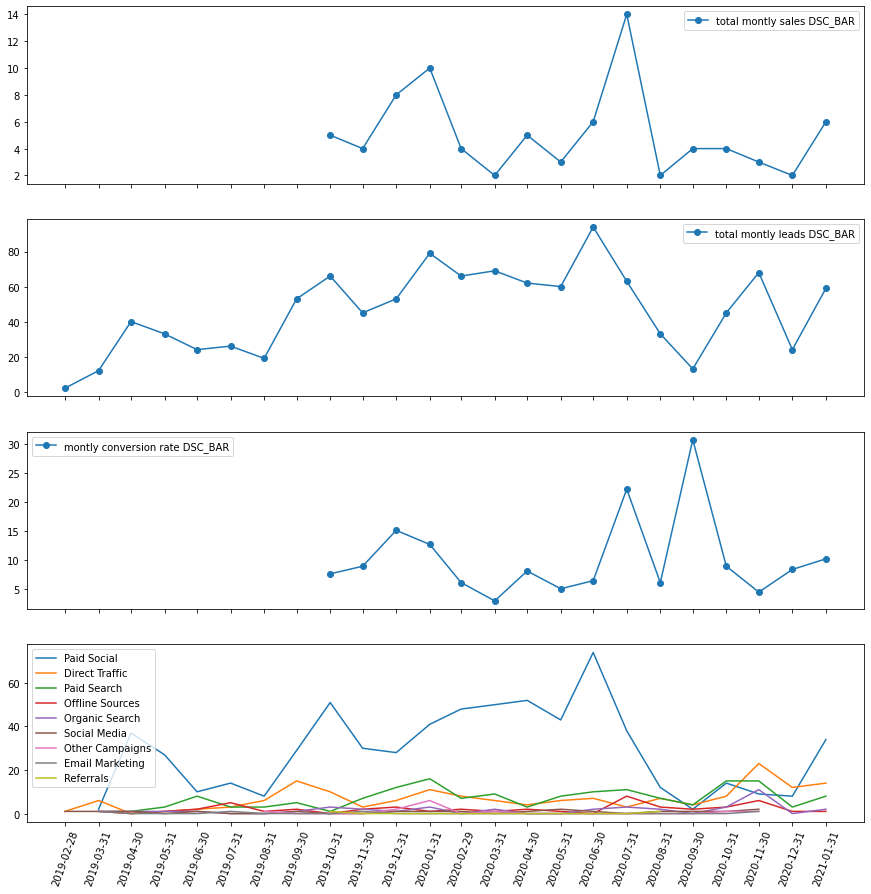

In [33]:
matriculas_master('DSC_BAR')

In [34]:
print('Proporción de leads por motivo de cierre por mes en {}'.format('DSC_BAR'))

#Obtenemos la tabla para conocer que proporción de leads se cierran por cada motivo de cierre en cada mes.

df_h1_dummies = pd.get_dummies(data=df_h1[['año', 'mes','Motivo del cierre']][(df_h1['Estado'] == 'Cerrado') & (df_h1['Master'] == 'DSC_BAR')],
                   prefix='',
                   prefix_sep="",
                   columns=['Motivo del cierre'],
                   dtype=None)
df_pt_mes_mc = df_h1_dummies.pivot_table(index=('año', 'mes'), values=(df_h1_dummies.columns), aggfunc=[np.mean])
df_pt_mes_mc.columns = df_pt_mes_mc.columns.droplevel(0)
round(df_pt_mes_mc,3)


Proporción de leads por motivo de cierre por mes en DSC_BAR


-999  COVID19  Coste  Criterios de Admisión  \
año    mes                                                  
2019.0 2.0   0.000    0.000  0.000                  0.000   
       3.0   0.000    0.000  0.000                  0.091   
       4.0   0.000    0.000  0.075                  0.000   
       5.0   0.031    0.000  0.062                  0.000   
       6.0   0.000    0.000  0.083                  0.000   
       7.0   0.000    0.000  0.130                  0.000   
       8.0   0.000    0.000  0.056                  0.000   
       9.0   0.000    0.000  0.140                  0.020   
       10.0  0.000    0.000  0.097                  0.016   
       11.0  0.000    0.000  0.122                  0.000   
       12.0  0.024    0.024  0.119                  0.000   
2020.0 1.0   0.014    0.014  0.014                  0.014   
       2.0   0.033    0.000  0.082                  0.000   
       3.0   0.000    0.075  0.104                  0.015   
       4.0   0.000    0.052  0.034                  0.000   
       5.0   0.018    0.018  0.211                  0.000   
       6.0   0.000    0.011  0.046                  0.023   
       7.0   0.018    0.000  0.196                  0.036   
       8.0   0.000    0.000  0.065                  0.000   
       9.0   0.000    0.000  0.000                  0.000   
       10.0  0.000    0.000  0.077                  0.000   
       11.0  0.017    0.000  0.051                  0.000   
       12.0  0.000    0.000  0.167                  0.000   
2021.0 1.0   0.000    0.000  0.100                  0.050   

             Desea Online (Español)  Desea Presencial (Ingles)  \
año    mes                                                       
2019.0 2.0                    0.000                      0.000   
       3.0                    0.000                      0.000   
       4.0                    0.000                      0.000   
       5.0                    0.062                      0.000   
       6.0                    0.042                      0.000   
       7.0                    0.000                      0.000   
       8.0                    0.000                      0.000   
       9.0                    0.000                      0.000   
       10.0                   0.065                      0.000   
       11.0                   0.024                      0.000   
       12.0                   0.024                      0.000   
2020.0 1.0                    0.027                      0.000   
       2.0                    0.000                      0.000   
       3.0                    0.015                      0.015   
       4.0                    0.000                      0.000   
       5.0                    0.000                      0.000   
       6.0                    0.000                      0.011   
       7.0                    0.000                      0.000   
       8.0                    0.000                      0.000   
       9.0                    0.000                      0.000   
       10.0                   0.000                      0.000   
       11.0                   0.000                      0.017   
       12.0                   0.000                      0.000   
2021.0 1.0                    0.050                      0.000   

             Imposible contactar  Matriculado en otra escuela  NO VÁLIDO  \
año    mes                                                                 
2019.0 2.0                 1.000                        0.000      0.000   
       3.0                 0.455                        0.091      0.000   
       4.0                 0.300                        0.100      0.000   
       5.0                 0.438                        0.000      0.094   
       6.0                 0.292                        0.083      0.042   
       7.0                 0.304                        0.043      0.130   
       8.0                 0.444                        0.000      0.000   
       9.0                

In [35]:
print('N de leads totales {}\n'.format(len(df_h1[['Master','Motivo del cierre']][(df_h1['Estado'] == 'Cerrado') & (df_h1['Master'] == 'DSC_BAR')])))

print('Proporción de leads por motivo de cierre en {}'.format('DSC_BAR'))

#Obtenemos la tabla para conocer que proporción de leads se cierran por cada motivo de cierre.

df_h1_dummies = pd.get_dummies(data=df_h1[['Master','Motivo del cierre']][(df_h1['Estado'] == 'Cerrado') & (df_h1['Master'] == 'DSC_BAR')],
                   prefix='',
                   prefix_sep="",
                   columns=['Motivo del cierre'],
                   dtype=None)
df_mc_pt_mean = df_h1_dummies.pivot_table(index=('Master'), values=(df_h1_dummies.columns), aggfunc=[np.mean])
df_mc_pt_mean = pd.DataFrame(df_mc_pt_mean.values, index=['media'], columns=df_mc_pt_mean.columns.droplevel(0))


df_mc_pt_sum = df_h1_dummies.pivot_table(index=('Master'), values=(df_h1_dummies.columns), aggfunc=[sum])
df_mc_pt_sum = pd.DataFrame(df_mc_pt_sum.values, index=['suma'], columns=df_mc_pt_sum.columns.droplevel(0))

df_mc_pt = round(df_mc_pt_sum.append(df_mc_pt_mean), 3)

df_mc_pt

N de leads totales 981

Proporción de leads por motivo de cierre en DSC_BAR


,-999,COVID19,Coste,Criterios de Admisión,Desea Online (Español),Desea Presencial (Ingles),Imposible contactar,Matriculado en otra escuela,NO VÁLIDO,No cumple expectativas,No es alumno (profesor/partner/inversor),Próximas convocatorias,Tiempo,Título no Universitario
suma,8.000,12.000,89.000,10.00,13.000,3.000,316.000,38.000,140.000,88.00,5.000,109.000,147.00,3.000
media,0.008,0.012,0.091,0.01,0.013,0.003,0.322,0.039,0.143,0.09,0.005,0.111,0.15,0.003


In [36]:
print('Proporción de leads por canal y mes en {}'.format('DSC_BAR'))

#Obtenemos la tabla para conocer que proporción de leads se están produciendo por canal en cada mes del año.

df_h1_dummies = pd.get_dummies(data=df_h1[['año', 'mes','Original Source']][(df_h1['Master'] == 'DSC_BAR')],
                   prefix=None,
                   prefix_sep="_",
                   columns=['Original Source'],
                   dtype=None)
df_pt_m = df_h1_dummies.pivot_table(index=('año', 'mes'), values=(df_h1_dummies.columns), aggfunc=[np.mean])

df_pt_m.columns = df_h1['Original Source'].value_counts().index.sort_values()

df_pt_m = round(df_pt_m, 3)

df_pt_m

Proporción de leads por canal y mes en DSC_BAR


Direct Traffic  Email Marketing  Offline Sources  Organic Search  \
año    mes                                                                      
2019.0 2.0            0.500            0.000            0.000           0.000   
       3.0            0.500            0.083            0.083           0.083   
       4.0            0.000            0.000            0.000           0.025   
       5.0            0.030            0.000            0.030           0.030   
       6.0            0.083            0.000            0.083           0.042   
       7.0            0.115            0.038            0.192           0.000   
       8.0            0.316            0.000            0.053           0.000   
       9.0            0.283            0.000            0.038           0.019   
       10.0           0.152            0.000            0.000           0.045   
       11.0           0.067            0.022            0.044           0.044   
       12.0           0.113            0.000            0.057           0.019   
2020.0 1.0            0.139            0.000            0.013           0.038   
       2.0            0.121            0.000            0.030           0.000   
       3.0            0.087            0.000            0.014           0.029   
       4.0            0.065            0.000            0.032           0.000   
       5.0            0.100            0.000            0.017           0.000   
       6.0            0.074            0.000            0.000           0.021   
       7.0            0.048            0.000            0.127           0.048   
       8.0            0.212            0.000            0.091           0.061   
       9.0            0.308            0.000            0.154           0.000   
       10.0           0.178            0.000            0.067           0.067   
       11.0           0.338            0.015            0.088           0.162   
       12.0           0.500            0.000            0.042           0.000   
2021.0 1.0            0.237            0.000            0.017           0.034   

             Other Campaigns  Paid Search  Paid Social  Referrals  \
año    mes                                                          
2019.0 2.0             0.000        0.000        0.000      0.000   
       3.0             0.000        0.000        0.167      0.000   
       4.0             0.000        0.025        0.925      0.000   
       5.0             0.000        0.091        0.818      0.000   
       6.0             0.000        0.333        0.417      0.000   
       7.0             0.000        0.115        0.538      0.000   
       8.0             0.053        0.158        0.421      0.000   
       9.0             0.000        0.094        0.547      0.000   
       10.0            0.000        0.015        0.773      0.015   
       11.0            0.000        0.156        0.667      0.000   
       12.0            0.038        0.226        0.528      0.000   
2020.0 1.0             0.076        0.203        0.519      0.000   
       2.0             0.000        0.106        0.727      0.000   
       3.0             0.014        0.130        0.725      0.000   
       4.0             0.000        0.048        0.839      0.000   
       5.0             0.000        0.133        0.717      0.000   
       6.0             0.000        0.106        0.787      0.000   
       7.0             0.000        0.175        0.603      0.000   
       8.0             0.000        0.212        0.364      0.030   
       9.0             0.000        0.308        0.154      0.000   
       10.0            0.022        0.333        0.311      0.000   
       11.0            0.015        0.221        0.132      0.000   
       12.0            0.000        0.125        0.333      0.000   
2021.0 1.0             0.000        0.136        0.576      0.000   

             Social Media  
año    mes                 
2019.0 2.0          0.500  
       3.0          0.083  

In [37]:
print('Proporción de leads sobre el total de leads por canal en {}'.format('DSC_BAR'))

#Obtenemos la tabla para conocer que proporción de leads se están produciendo por canal
df_h1_dummies = pd.get_dummies(data=df_h1[['Master','Original Source']][(df_h1['Master'] == 'DSC_BAR')],
                   prefix=None,
                   prefix_sep="_",
                   columns=['Original Source'],
                   dtype=None)
df_pt_lt_mean = df_h1_dummies.pivot_table(index=('Master'), values=(df_h1_dummies.columns), aggfunc=[np.mean])
df_pt_lt_sum = df_h1_dummies.pivot_table(index=('Master'), values=(df_h1_dummies.columns), aggfunc=[sum])

df_pt_lt_mean.columns = df_h1['Original Source'].value_counts().index.sort_values()

df_pt_lt_sum.columns = df_h1['Original Source'].value_counts().index.sort_values()

df_pt_lt = df_pt_lt_mean.append(df_pt_lt_sum)

df_pt_lt.index = ['media', 'n de leads']

df_pt_lt = round(df_pt_lt, 3)

df_pt_lt



Proporción de leads sobre el total de leads por canal en DSC_BAR


,Direct Traffic,Email Marketing,Offline Sources,Organic Search,Other Campaigns,Paid Search,Paid Social,Referrals,Social Media
media,0.15,0.004,0.043,0.035,0.011,0.144,0.597,0.002,0.015
n de leads,166.00,4.000,48.000,39.000,12.000,159.000,661.000,2.000,17.000


In [38]:
print('Ventas, leads y conversión por canal de marketing en {}'.format('DSC_BAR'))

#Genera una tabla con el número de ventas por canal de marketing
df_h1_dummies = pd.get_dummies(data=df_h1[['Master','Original Source']][(df_h1['Master'] == 'DSC_BAR') & (df_h1['Estado'] == 'Matriculado')],
                   prefix=None,
                   prefix_sep="_",
                   columns=['Original Source'],
                   dtype=None)
df_pt_h1 = round(df_h1_dummies.pivot_table(index=('Master'), values=(df_h1_dummies.columns), aggfunc=[sum]), 0)

#Genera una tabla con el número de leads por canal de marketing
df_h1_dummies = pd.get_dummies(data=df_h1[['Master','Original Source']][(df_h1['Master'] == 'DSC_BAR')],
                   prefix=None,
                   prefix_sep="_",
                   columns=['Original Source'],
                   dtype=None)
df_pt_h2 = round(df_h1_dummies.pivot_table(index=('Master'), values=(df_h1_dummies.columns), aggfunc=[sum]),0)

#Genera una tabla con la conversión por canal de marketing
df_pt_h3 = round(df_pt_h1 / df_pt_h2,3)

#unir y embellecer las tablas
df_pt_h1 = df_pt_h1.append(df_pt_h2)
df_pt_h4 = df_pt_h1.append(df_pt_h3)

df_pt_h4.columns = df_h1['Original Source'].value_counts().index.sort_values()

df_pt_h4.index = ['Ventas', 'Leads', 'Conversion']

df_pt_h4 = df_pt_h4.T

df_pt_h4

Ventas, leads y conversión por canal de marketing en DSC_BAR


,Ventas,Leads,Conversion
Direct Traffic,16.0,166.0,0.096
Email Marketing,1.0,4.0,0.250
Offline Sources,10.0,48.0,0.208
Organic Search,4.0,39.0,0.103
Other Campaigns,1.0,12.0,0.083
Paid Search,21.0,159.0,0.132
Paid Social,25.0,661.0,0.038
Referrals,NaN,2.0,NaN
Social Media,5.0,17.0,0.294


In [39]:
print('N de leads y conversión por canal de marketing en Original Source Drill-Down 1 del master {}\n'.format('DSC_BAR'))

#Cálculo de los canales con mayor conversión a venta usando el canal "Original Source Drill-Down 1"
index_to_search = df_h1['Original Source Drill-Down 1'][(df_h1['Master'] == 'DSC_BAR') & (df_h1['Estado'] == 'Matriculado')].value_counts().head(20).index

df_os_leads = pd.DataFrame()
for i in index_to_search:
    
    df_os_leads_v = df_h1['Original Source Drill-Down 1'][(df_h1['Original Source Drill-Down 1'] == i) & (df_h1['Master'] == 'DSC_BAR') & (df_h1['Estado'] == 'Matriculado')]
    
    df_os_leads_leads = df_h1['Original Source Drill-Down 1'][(df_h1['Original Source Drill-Down 1'] == i) & (df_h1['Master'] == 'DSC_BAR')]
    
    print('Canal {}\nleads {}\nmedia {}\n'.format(i, len(df_os_leads_leads), round(len(df_os_leads_v) / len(df_os_leads_leads),3)))
    
    

N de leads y conversión por canal de marketing en Original Source Drill-Down 1 del master DSC_BAR

Canal Facebook
leads 662
media 0.038

Canal nuclio.school/master-data-science
leads 91
media 0.099

Canal long_tail_general
leads 39
media 0.231

Canal CONTACTS
leads 26
media 0.231

Canal global campaign branding - barcelona
leads 24
media 0.208

Canal Unknown keywords (SSL)
leads 39
media 0.103

Canal nuclio.school/
leads 15
media 0.267

Canal Instagram
leads 6
media 0.667

Canal SALES
leads 5
media 0.6

Canal as-digital product- search
leads 40
media 0.075

Canal bck_general
leads 16
media 0.125

Canal LinkedIn
leads 7
media 0.143

Canal link en bio-ig
leads 4
media 0.25

Canal nuclio.school/events/modelo-de-ventas-escalable-para-startups-b2b
leads 1
media 1.0

Canal nuclio.school/school
leads 2
media 0.5

Canal INTEGRATION
leads 10
media 0.1

Canal full stack developer master - jg
leads 3
media 0.333

Canal -999
leads 5
media 0.2

Canal augmentes analytics - search
leads 10
media 0.1


In [40]:
print('N de leads y conversión por canal de marketing en Original Source Drill-Down 2 del master {}\n'.format('DSC_BAR'))

#Cálculo de los canales con mayor conversión a venta usando el canal "Original Source Drill-Down 2"

index_to_search = df_h1['Original Source Drill-Down 2'][(df_h1['Master'] == 'DSC_BAR') & (df_h1['Estado'] == 'Matriculado')].value_counts().head(20).index

for i in index_to_search:
    
    df_os_leads_v = df_h1['Original Source Drill-Down 2'][(df_h1['Original Source Drill-Down 2'] == i) & (df_h1['Master'] == 'DSC_BAR') & (df_h1['Estado'] == 'Matriculado')]
    
    df_os_leads_leads = df_h1['Original Source Drill-Down 2'][(df_h1['Original Source Drill-Down 2'] == i) & (df_h1['Master'] == 'DSC_BAR')]
    
    print('Canal {}\nleads {}\nmedia {}\n'.format(i, len(df_os_leads_leads), round(len(df_os_leads_v) / len(df_os_leads_leads),3)))
    
   

N de leads y conversión por canal de marketing en Original Source Drill-Down 2 del master DSC_BAR

Canal -999
leads 184
media 0.103

Canal CRM_UI
leads 26
media 0.231

Canal mds0520_segmentación-test_febrero
leads 120
media 0.042

Canal GOOGLE
leads 39
media 0.103

Canal ck-data
leads 40
media 0.075

Canal ck-data-formulario
leads 54
media 0.056

Canal nuclio digital school
leads 13
media 0.231

Canal later-linkinbio-nuclioschool
leads 3
media 1.0

Canal SIDEKICK
leads 5
media 0.6

Canal bootcamp  big  data
leads 2
media 1.0

Canal mds0220_general_octubre
leads 16
media 0.125

Canal mds0220_fases-landing_diciembre
leads 29
media 0.069

Canal data  science  barcelona
leads 14
media 0.143

Canal master big data barcelona
leads 2
media 0.5

Canal Zoom Integration
leads 9
media 0.111

Canal coding  school  barcelona
leads 1
media 1.0

Canal fsd1120_general_septiembre
leads 7
media 0.143

Canal estudiar en barcelona
leads 1
media 1.0

Canal curso  programar
leads 1
media 1.0

Canal big data

In [41]:
def matriculas_master(codigo):  
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,15), sharex=True)

    df_1 = df[df['Edición'].str.contains(codigo, na=False)]
    df_2 = df_h1[df_h1['Master'].str.contains(codigo, na=False)]    

#Gráfica de ventas a traves del año
    x = df_1[['Fecha','Precio']].set_index('Fecha').resample('m').count()
    ax1.plot(x.index, x, label='total montly sales {}'.format(codigo), marker = 'o')

#Gráfica de leads a traves del año
    y = df_2[['Fecha','Master']].set_index('Fecha').resample('m').count()
    ax2.plot(y.index, y, label='total montly leads {}'.format(codigo), marker = 'o')

#Gráfica de conversión a traves del año
    z = (x['Precio']/y['Master']) * 100
    ax3.plot(z.index, z, label='montly conversion rate {}'.format(codigo), marker = 'o')
    
#Gráfica de leads por canal en el programa.
    
    for i in df_2['Original Source'].value_counts().index:
        
        q = df_2[['Fecha','Original Source']][df_2['Original Source'] == i].set_index('Fecha').resample('m').count()
        ax4.plot(q.index, q, label=i.format(codigo))   

#Agregamos algunos detalles a las gráficas y a imprimir
    ax1.set_xticks(x.index)
    ax2.set_xticks(y.index)
    ax3.set_xticks(z.index)
    ax4.set_xticks(z.index)
    
    plt.xticks(rotation=70)
    
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()
    
#Obtenemos aquí la media de conversión del programa por comercial
    
    owners_excluidos = ['Ahmad Halloun', 'Jordi Tena Legido', 'Gisela Moreno (Deactivated User)', 'Albert Cobacho', 'Jared Gil', 'Marta Garcia', 'Sára Földes', 'Guillermo Araujo (Deactivated User)', 'Laura Jimenez', 'caio araujo (Deactivated User)', 'Nil Edmon Armengol Tous (Deactivated User)', 'alex.sainz@nuclio.school', 'charles kotzer', 'Júlia Ferrer Soler']
    
    print('Media de conversión por comercial en: {}\n'.format(codigo))
    
    for j in df_hs['Contact owner'].value_counts().index:
        
        ventas = len(df[(df['Comercial'] == j) & (df['Precio']>0) & (df['Edición'].str.contains(codigo))])
        leads = len(df_hs[(df_hs['Contact owner'] == j) & (df_hs['Master'].str.contains(codigo, na=False))]) 


        if j not in owners_excluidos:
            
            if leads > 0:
                media = ventas / leads
            else:
                media = 0
                
            print('{} \nconv.:{}%, ventas:{}, leads:{}\n'.format(j, round((media*100), 2), ventas, leads))
            
            
    print('Proporción de leads por motivo de cierre por mes en {}\n'.format(codigo))

#Obtenemos la tabla para conocer que proporción de leads se cierran por cada motivo de cierre en cada mes.

    df_h1_dummies = pd.get_dummies(data=df_h1[['año', 'mes','Motivo del cierre']][(df_h1['Estado'] == 'Cerrado') & (df_h1['Master'] == codigo)],
                       prefix='',
                       prefix_sep="",
                       columns=['Motivo del cierre'],
                       dtype=None)
    df_pt_mes_mc = df_h1_dummies.pivot_table(index=('año', 'mes'), values=(df_h1_dummies.columns), aggfunc=[np.mean])
    df_pt_mes_mc.columns = df_pt_mes_mc.columns.droplevel(0)
    df_pt_mes_mc = round(df_pt_mes_mc,3)  
    display(df_pt_mes_mc)

#Obtenemos la tabla para conocer que proporción de leads se cierran por cada motivo de cierre.
    
    print('N de leads totales {}\n'.format(len(df_h1[['Master','Motivo del cierre']][(df_h1['Estado'] == 'Cerrado') & (df_h1['Master'] == codigo)])))

    print('Proporción de leads por motivo de cierre en {}'.format(codigo))


    df_h1_dummies = pd.get_dummies(data=df_h1[['Master','Motivo del cierre']][(df_h1['Estado'] == 'Cerrado') & (df_h1['Master'] == codigo)],
                       prefix='',
                       prefix_sep="",
                       columns=['Motivo del cierre'],
                       dtype=None)
    df_mc_pt_mean = df_h1_dummies.pivot_table(index=('Master'), values=(df_h1_dummies.columns), aggfunc=[np.mean])
    df_mc_pt_mean = pd.DataFrame(df_mc_pt_mean.values, index=['media'], columns=df_mc_pt_mean.columns.droplevel(0))


    df_mc_pt_sum = df_h1_dummies.pivot_table(index=('Master'), values=(df_h1_dummies.columns), aggfunc=[sum])
    df_mc_pt_sum = pd.DataFrame(df_mc_pt_sum.values, index=['suma'], columns=df_mc_pt_sum.columns.droplevel(0))

    df_mc_pt = round(df_mc_pt_sum.append(df_mc_pt_mean), 3)

    display(df_mc_pt)
            
#Obtenemos la tabla para conocer que proporción de leads se están produciendo por canal en cada mes del año.
    
    print('Proporción de leads por canal y mes en {}'.format(codigo))

    df_h1_dummies = pd.get_dummies(data=df_h1[['año', 'mes','Original Source']][(df_h1['Master'] == codigo)],
                       prefix=None,
                       prefix_sep="_",
                       columns=['Original Source'],
                       dtype=None)
    df_pt_m = df_h1_dummies.pivot_table(index=('año', 'mes'), values=(df_h1_dummies.columns), aggfunc=[np.mean])

    df_pt_m.columns = df_h1['Original Source'].value_counts().index.sort_values()

    df_pt_m = round(df_pt_m, 3)

    display(df_pt_m)

    
#Obtenemos la tabla para conocer que proporción de leads se están produciendo por canal

    print('Proporción de leads sobre el total de leads por canal en {}'.format(codigo))

    df_h1_dummies = pd.get_dummies(data=df_h1[['Master','Original Source']][(df_h1['Master'] == codigo)],
                       prefix=None,
                       prefix_sep="_",
                       columns=['Original Source'],
                       dtype=None)
    df_pt_lt_mean = df_h1_dummies.pivot_table(index=('Master'), values=(df_h1_dummies.columns), aggfunc=[np.mean])
    df_pt_lt_sum = df_h1_dummies.pivot_table(index=('Master'), values=(df_h1_dummies.columns), aggfunc=[sum])

    df_pt_lt_mean.columns = df_h1['Original Source'].value_counts().index.sort_values()

    df_pt_lt_sum.columns = df_h1['Original Source'].value_counts().index.sort_values()

    df_pt_lt = df_pt_lt_mean.append(df_pt_lt_sum)

    df_pt_lt.index = ['media', 'n de leads']

    df_pt_lt = round(df_pt_lt, 3)

    display(df_pt_lt)

#Ventas, leads y conversión por canal de marketing    

    print('Ventas, leads y conversión por canal de marketing en {}'.format(codigo))

#Genera una tabla con el número de ventas por canal de marketing
    df_h1_dummies = pd.get_dummies(data=df_h1[['Master','Original Source']][(df_h1['Master'] == codigo) & (df_h1['Estado'] == 'Matriculado')],
                       prefix=None,
                       prefix_sep="_",
                       columns=['Original Source'],
                       dtype=None)
    df_pt_h1 = round(df_h1_dummies.pivot_table(index=('Master'), values=(df_h1_dummies.columns), aggfunc=[sum]), 0)

#Genera una tabla con el número de leads por canal de marketing
    df_h1_dummies = pd.get_dummies(data=df_h1[['Master','Original Source']][(df_h1['Master'] == codigo)],
                       prefix=None,
                       prefix_sep="_",
                       columns=['Original Source'],
                       dtype=None)
    df_pt_h2 = round(df_h1_dummies.pivot_table(index=('Master'), values=(df_h1_dummies.columns), aggfunc=[sum]),0)

#Genera una tabla con la conversión por canal de marketing
    df_pt_h3 = round(df_pt_h1 / df_pt_h2,3)

#unir y embellecer las tablas
    df_pt_h1 = df_pt_h1.append(df_pt_h2)
    df_pt_h4 = df_pt_h1.append(df_pt_h3)

    df_pt_h4.columns = df_h1['Original Source'].value_counts().index.sort_values()

    df_pt_h4.index = ['Ventas', 'Leads', 'Conversion']

    df_pt_h4 = df_pt_h4.T

    display(df_pt_h4)


#Cálculo de los canales con mayor conversión a venta usando el canal "Original Source Drill-Down 1"

    
    print('N de leads y conversión por canal de marketing en Original Source Drill-Down 1 del master {}\n'.format(codigo))

    index_to_search = df_h1['Original Source Drill-Down 1'][(df_h1['Master'] == codigo) & (df_h1['Estado'] == 'Matriculado')].value_counts().head(20).index

    df_os_leads = pd.DataFrame()
    
    for i in index_to_search:
    
        df_os_leads_v = df_h1['Original Source Drill-Down 1'][(df_h1['Original Source Drill-Down 1'] == i) & (df_h1['Master'] == codigo) & (df_h1['Estado'] == 'Matriculado')]

        df_os_leads_leads = df_h1['Original Source Drill-Down 1'][(df_h1['Original Source Drill-Down 1'] == i) & (df_h1['Master'] == codigo)]

        print('Canal {}\nleads {}\nmedia {}\n'.format(i, len(df_os_leads_leads), round(len(df_os_leads_v) / len(df_os_leads_leads),3)))


#Cálculo de los canales con mayor conversión a venta usando el canal "Original Source Drill-Down 2"

    print('N de leads y conversión por canal de marketing en Original Source Drill-Down 2 del master {}\n'.format(codigo))


    index_to_search = df_h1['Original Source Drill-Down 2'][(df_h1['Master'] == codigo) & (df_h1['Estado'] == 'Matriculado')].value_counts().head(20).index

    for i in index_to_search:

        df_os_leads_v = df_h1['Original Source Drill-Down 2'][(df_h1['Original Source Drill-Down 2'] == i) & (df_h1['Master'] == codigo) & (df_h1['Estado'] == 'Matriculado')]

        df_os_leads_leads = df_h1['Original Source Drill-Down 2'][(df_h1['Original Source Drill-Down 2'] == i) & (df_h1['Master'] == codigo)]

        print('Canal {}\nleads {}\nmedia {}\n'.format(i, len(df_os_leads_leads), round(len(df_os_leads_v) / len(df_os_leads_leads),3)))


Media de conversión por comercial en: DSC_BAR

Jorge Jiménez 
conv.:6.08%, ventas:23, leads:378

Veronica Cignoli 
conv.:50.0%, ventas:1, leads:2

Joel Orteu 
conv.:11.79%, ventas:23, leads:195

Sergio del Frago 
conv.:5.59%, ventas:10, leads:179

Irene Safer 
conv.:7.1%, ventas:13, leads:183

Joanne Mattar 
conv.:0%, ventas:0, leads:0

Francesc Ramirez 
conv.:4.17%, ventas:1, leads:24

Anna Rovira 
conv.:10.71%, ventas:3, leads:28

Vanina Correa 
conv.:7.69%, ventas:1, leads:13

Gara Gutierrez 
conv.:5.88%, ventas:1, leads:17

Clara Fernández 
conv.:6.67%, ventas:1, leads:15

Sonia Pérez 
conv.:0.0%, ventas:0, leads:15

Cyntia Sena 
conv.:0.0%, ventas:0, leads:1

Daniela Barreto 
conv.:0%, ventas:0, leads:0

Paola Micaela Lemos Guedes 
conv.:0%, ventas:0, leads:0

Proporción de leads por motivo de cierre por mes en DSC_BAR



-999  COVID19  Coste  Criterios de Admisión  \
año    mes                                                  
2019.0 2.0   0.000    0.000  0.000                  0.000   
       3.0   0.000    0.000  0.000                  0.091   
       4.0   0.000    0.000  0.075                  0.000   
       5.0   0.031    0.000  0.062                  0.000   
       6.0   0.000    0.000  0.083                  0.000   
       7.0   0.000    0.000  0.130                  0.000   
       8.0   0.000    0.000  0.056                  0.000   
       9.0   0.000    0.000  0.140                  0.020   
       10.0  0.000    0.000  0.097                  0.016   
       11.0  0.000    0.000  0.122                  0.000   
       12.0  0.024    0.024  0.119                  0.000   
2020.0 1.0   0.014    0.014  0.014                  0.014   
       2.0   0.033    0.000  0.082                  0.000   
       3.0   0.000    0.075  0.104                  0.015   
       4.0   0.000    0.052  0.034                  0.000   
       5.0   0.018    0.018  0.211                  0.000   
       6.0   0.000    0.011  0.046                  0.023   
       7.0   0.018    0.000  0.196                  0.036   
       8.0   0.000    0.000  0.065                  0.000   
       9.0   0.000    0.000  0.000                  0.000   
       10.0  0.000    0.000  0.077                  0.000   
       11.0  0.017    0.000  0.051                  0.000   
       12.0  0.000    0.000  0.167                  0.000   
2021.0 1.0   0.000    0.000  0.100                  0.050   

             Desea Online (Español)  Desea Presencial (Ingles)  \
año    mes                                                       
2019.0 2.0                    0.000                      0.000   
       3.0                    0.000                      0.000   
       4.0                    0.000                      0.000   
       5.0                    0.062                      0.000   
       6.0                    0.042                      0.000   
       7.0                    0.000                      0.000   
       8.0                    0.000                      0.000   
       9.0                    0.000                      0.000   
       10.0                   0.065                      0.000   
       11.0                   0.024                      0.000   
       12.0                   0.024                      0.000   
2020.0 1.0                    0.027                      0.000   
       2.0                    0.000                      0.000   
       3.0                    0.015                      0.015   
       4.0                    0.000                      0.000   
       5.0                    0.000                      0.000   
       6.0                    0.000                      0.011   
       7.0                    0.000                      0.000   
       8.0                    0.000                      0.000   
       9.0                    0.000                      0.000   
       10.0                   0.000                      0.000   
       11.0                   0.000                      0.017   
       12.0                   0.000                      0.000   
2021.0 1.0                    0.050                      0.000   

             Imposible contactar  Matriculado en otra escuela  NO VÁLIDO  \
año    mes                                                                 
2019.0 2.0                 1.000                        0.000      0.000   
       3.0                 0.455                        0.091      0.000   
       4.0                 0.300                        0.100      0.000   
       5.0                 0.438                        0.000      0.094   
       6.0                 0.292                        0.083      0.042   
       7.0                 0.304                        0.043      0.130   
       8.0                 0.444                        0.000      0.000   
       9.0                

N de leads totales 981

Proporción de leads por motivo de cierre en DSC_BAR


,-999,COVID19,Coste,Criterios de Admisión,Desea Online (Español),Desea Presencial (Ingles),Imposible contactar,Matriculado en otra escuela,NO VÁLIDO,No cumple expectativas,No es alumno (profesor/partner/inversor),Próximas convocatorias,Tiempo,Título no Universitario
suma,8.000,12.000,89.000,10.00,13.000,3.000,316.000,38.000,140.000,88.00,5.000,109.000,147.00,3.000
media,0.008,0.012,0.091,0.01,0.013,0.003,0.322,0.039,0.143,0.09,0.005,0.111,0.15,0.003


Proporción de leads por canal y mes en DSC_BAR


Direct Traffic  Email Marketing  Offline Sources  Organic Search  \
año    mes                                                                      
2019.0 2.0            0.500            0.000            0.000           0.000   
       3.0            0.500            0.083            0.083           0.083   
       4.0            0.000            0.000            0.000           0.025   
       5.0            0.030            0.000            0.030           0.030   
       6.0            0.083            0.000            0.083           0.042   
       7.0            0.115            0.038            0.192           0.000   
       8.0            0.316            0.000            0.053           0.000   
       9.0            0.283            0.000            0.038           0.019   
       10.0           0.152            0.000            0.000           0.045   
       11.0           0.067            0.022            0.044           0.044   
       12.0           0.113            0.000            0.057           0.019   
2020.0 1.0            0.139            0.000            0.013           0.038   
       2.0            0.121            0.000            0.030           0.000   
       3.0            0.087            0.000            0.014           0.029   
       4.0            0.065            0.000            0.032           0.000   
       5.0            0.100            0.000            0.017           0.000   
       6.0            0.074            0.000            0.000           0.021   
       7.0            0.048            0.000            0.127           0.048   
       8.0            0.212            0.000            0.091           0.061   
       9.0            0.308            0.000            0.154           0.000   
       10.0           0.178            0.000            0.067           0.067   
       11.0           0.338            0.015            0.088           0.162   
       12.0           0.500            0.000            0.042           0.000   
2021.0 1.0            0.237            0.000            0.017           0.034   

             Other Campaigns  Paid Search  Paid Social  Referrals  \
año    mes                                                          
2019.0 2.0             0.000        0.000        0.000      0.000   
       3.0             0.000        0.000        0.167      0.000   
       4.0             0.000        0.025        0.925      0.000   
       5.0             0.000        0.091        0.818      0.000   
       6.0             0.000        0.333        0.417      0.000   
       7.0             0.000        0.115        0.538      0.000   
       8.0             0.053        0.158        0.421      0.000   
       9.0             0.000        0.094        0.547      0.000   
       10.0            0.000        0.015        0.773      0.015   
       11.0            0.000        0.156        0.667      0.000   
       12.0            0.038        0.226        0.528      0.000   
2020.0 1.0             0.076        0.203        0.519      0.000   
       2.0             0.000        0.106        0.727      0.000   
       3.0             0.014        0.130        0.725      0.000   
       4.0             0.000        0.048        0.839      0.000   
       5.0             0.000        0.133        0.717      0.000   
       6.0             0.000        0.106        0.787      0.000   
       7.0             0.000        0.175        0.603      0.000   
       8.0             0.000        0.212        0.364      0.030   
       9.0             0.000        0.308        0.154      0.000   
       10.0            0.022        0.333        0.311      0.000   
       11.0            0.015        0.221        0.132      0.000   
       12.0            0.000        0.125        0.333      0.000   
2021.0 1.0             0.000        0.136        0.576      0.000   

             Social Media  
año    mes                 
2019.0 2.0          0.500  
       3.0          0.083  

Proporción de leads sobre el total de leads por canal en DSC_BAR


,Direct Traffic,Email Marketing,Offline Sources,Organic Search,Other Campaigns,Paid Search,Paid Social,Referrals,Social Media
media,0.15,0.004,0.043,0.035,0.011,0.144,0.597,0.002,0.015
n de leads,166.00,4.000,48.000,39.000,12.000,159.000,661.000,2.000,17.000


Ventas, leads y conversión por canal de marketing en DSC_BAR


,Ventas,Leads,Conversion
Direct Traffic,16.0,166.0,0.096
Email Marketing,1.0,4.0,0.250
Offline Sources,10.0,48.0,0.208
Organic Search,4.0,39.0,0.103
Other Campaigns,1.0,12.0,0.083
Paid Search,21.0,159.0,0.132
Paid Social,25.0,661.0,0.038
Referrals,NaN,2.0,NaN
Social Media,5.0,17.0,0.294


N de leads y conversión por canal de marketing en Original Source Drill-Down 1 del master DSC_BAR

Canal Facebook
leads 662
media 0.038

Canal nuclio.school/master-data-science
leads 91
media 0.099

Canal long_tail_general
leads 39
media 0.231

Canal CONTACTS
leads 26
media 0.231

Canal global campaign branding - barcelona
leads 24
media 0.208

Canal Unknown keywords (SSL)
leads 39
media 0.103

Canal nuclio.school/
leads 15
media 0.267

Canal Instagram
leads 6
media 0.667

Canal SALES
leads 5
media 0.6

Canal as-digital product- search
leads 40
media 0.075

Canal bck_general
leads 16
media 0.125

Canal LinkedIn
leads 7
media 0.143

Canal link en bio-ig
leads 4
media 0.25

Canal nuclio.school/events/modelo-de-ventas-escalable-para-startups-b2b
leads 1
media 1.0

Canal nuclio.school/school
leads 2
media 0.5

Canal INTEGRATION
leads 10
media 0.1

Canal full stack developer master - jg
leads 3
media 0.333

Canal -999
leads 5
media 0.2

Canal augmentes analytics - search
leads 10
media 0.1


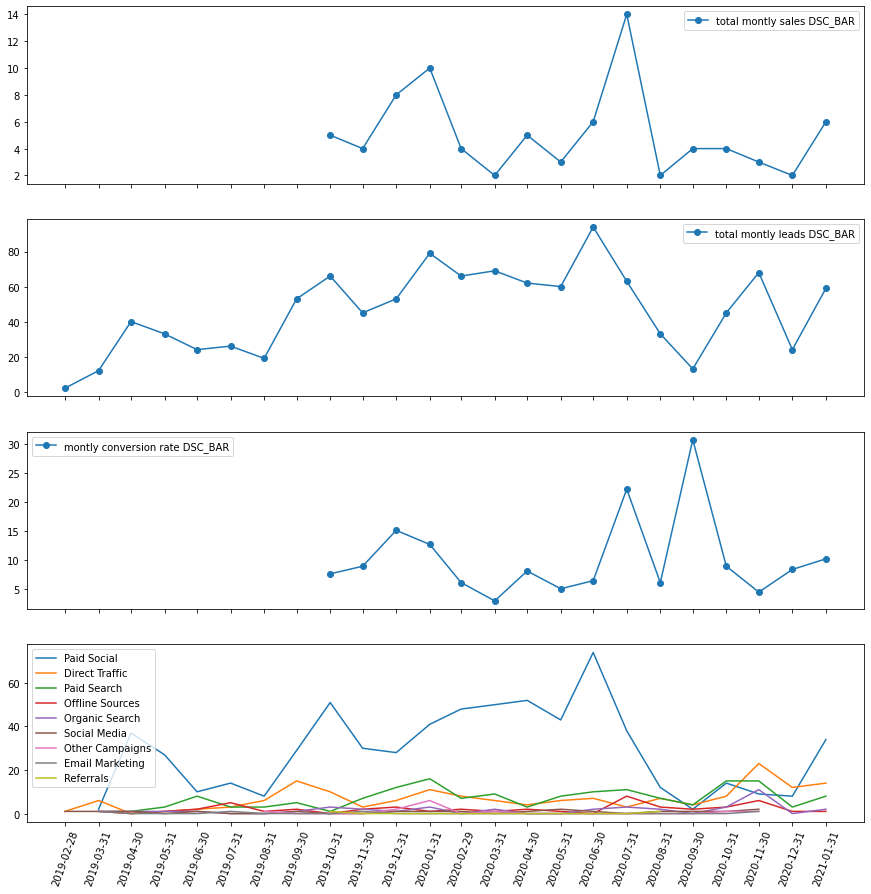

In [42]:
matriculas_master('DSC_BAR')

In [43]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install anvil-uplink

  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45221 sha256=68d311f4e38197306fe3b403c0ddcce892d2060490edee7b012a8c89e2dd48cf
  Stored in directory: c:\users\charl\appdata\local\pip\cache\wheels\ea\f9\a1\34e2943cce3cf7daca304bfc35e91280694ced9194a487ce2f
Successfully built ws4py
Note: you may need to restart the kernel to use updated packages.
